<a href="https://colab.research.google.com/github/HugoKD/RL/blob/main/Eligibility_Traces_Explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Project: Visualization of Eligibility Traces </center>

## Team Members

- CADET Hugo
- GORGE Victoire
- MARTIAL Mathieu

### Image Folder (not interesting for the tuto)

In [ ]:
from IPython.display import HTML

In [ ]:
def decay_function(n_values, lambda_values):
    plt.figure(figsize=(9, 3))
    for lambda_val in lambda_values:
        decay_values = [(1 - lambda_val) * lambda_val**n for n in n_values]
        plt.plot(n_values, decay_values, label=f'λ = {lambda_val}')

    plt.title('Decay of (1 - λ)λ^n for Different Values of λ')
    plt.xlabel('n')
    plt.ylabel('(1 - λ)λ^n')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
image_path = 'data:image/jpeg;base64,/9j/4QC8RXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABgAAAAAQAAAGAAAAABAAAABgAAkAcABAAAADAyMTABkQcABAAAAAECAwAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAMIBAAADoAQAAQAAAMgCAAAAAAAA/+ENXmh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDIzLTEyLTE0PC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjJjZjYzNThiLTgyMWItNDQ3NS05NDA5LWU5ZGUwZTFlNDVlYjwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5HIC0gMTwvcmRmOmxpPgogICA8L3JkZjpBbHQ+CiAgPC9kYzp0aXRsZT4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvJz4KICA8eG1wOkNyZWF0b3JUb29sPkNhbnZhPC94bXA6Q3JlYXRvclRvb2w+CiA8L3JkZjpEZXNjcmlwdGlvbj4KPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0ndyc/Pv/bAEMABgQFBgUEBgYFBgcHBggKEAoKCQkKFA4PDBAXFBgYFxQWFhodJR8aGyMcFhYgLCAjJicpKikZHy0wLSgwJSgpKP/bAEMBBwcHCggKEwoKEygaFhooKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKP/AABEIAsgBwgMBIgACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/APqmiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiivLNW+Pfw+0nV7zTb/V547uzne3mX7HKwV0YqwyF55B6UAep0Vg+D/F+geMtPa98M6nBqFujbXMeVZD2DKwDL+IFb1ABRRWP4s8TaR4S0WXVvEN9HZWMZCmRwSWY9FVRksTzwB2oA2KK8+8CfGDwZ431Q6boepsdQwWS3uImiaQDklcjB45wDnHOK9BoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACviTwv4q8IeFfjH8RZ/HWmJqNpPfXUcMTWaXHz/aWJ4fgcd6+26+Z/hH4Fubz4tfE9fFPh27XR9Rkukilu7R0jmV7huY3YYJKnIKn3FACfsm6JdyeKfFniqy0+bTPC2os8dhBJwGHmllC+oRQVz0ySBnBr3nx/e6xp3hK/uvDf9nf2tHs8j+0X2QcyKG3nIx8pbHPXFeNfBKHxJ8MvGOs+CNb0/Urjwp5j3Fhq/2Z2t4eN3zyAbVDL1ycKwPqTXtniPQ9I8ZeG5tL1aJb7SL1UZljlZRIoZXUhkIOMqp4PNAHin/CbfGD/qnP/gb/APbq4/4+X2r+IpvhVpPic2PnX1y7XiafJut2ZpkjG05OcKT36sa6/X/APwB8P6t/ZesmxtL8Y3QyancZTIyN2H+Xgg844NJ8cvhfI/gzwlffDWz88+G5DNbWsMhmMkLssm5CSS+GUEDPIY47CgDB/aV02x8H/EP4ba14fs7ewuPPZGFtGIwyxSQlQQBzxIw+nFfUlfK17D4t+NvxL8J3Gp+Eb/w9oWiOJblrxWAY7lZwpZVyW2KoABx1NfVNABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAed/tCRTSfB3xM0F5c2rR2pdjAQDIvQo2QflIPOMH361geBbu88B/C7w1dWln4q8WnU7S3mMMbpP9jBgQ7EGF2x9gOfrXrOq6faatpt1p+owJcWV1G0M0T9HRhgg1i+CPBOgeCLGe08M2TWkE7iSRWnklyQMDl2JAx2FAHmfx2s9Yv/BWp6rpGj+HY9NuNP8AM1h72PGox7QCURsbd6rwNxJBHHavR/hXcaddfDfw1LoqXCab9ghSBbggyBVULhiOCeOo49KyfEPwe8DeIdcn1fV9E8+9uHEkzC6mRZWAwCyK4U9B2qXxv4ssfBelwabpMMAu1iCW9si4jgjAwCQOgwOBQB1Gua5puh24m1S7jt0P3QeWb6KOTXn+o/GGxikK6fpdxcKP4pZBFn8AGryHU9Qu9UvHu9QnknuH6u5z+A9B7CqtAHrY+MrZ50Ncf9ff/wBhWzo/xZ0e7kWPULe4sGP8Z/eIPqRz+leF0UAfWlnd297bJcWc0c8DjKvG2Qamr5i8KeKNR8NXgmsZS0JOZbdydkg+nY+9fQ/hfX7PxHpSXti3B+WSM/ejbuD/AJ5oA1qKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAM3xHq0OhaJd6jcDKQJkLnG5jwB+JIr5g1XUJ9Rv7i+vpN08zGR2PA/wDrAfyr1r486kUtdM01G4kZp5B9OF/m35V4lqsEd1pl3bzSeVHNE0bPnG0EYz+tAFay17Sr66+zWl/bzT84RX5OOuPX8K0I5Ek3eW6vtJU7TnBHUfWuF0Hz9G1O00HUra1EksTraX9sq78AHOcjrjv/ADqHwLssfD+o6rd3955aPMrx7gVzkHeBj7/v70Aeh0xJEdnVHVmQ4YA5IPvXnejahfQ+JNGUT6obPUEdiL6VH3jbkMqr93t1qXwnBNBeeJL77beSyWdzMPKZxtmIBwXAHJ47YoA9Crp/h54kfw34gildj9inIiuF7bezfUdfz9a8M8P3fiC7/s7UYTqE/mz/AOkGSWP7OYyxBCpnKkV6ZQB9dAggEEEHkEUVzHw01I6n4L02WRsyxIYH+qHA/QA/jXT0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeF/HVifFlmueBZKQP8AtpJXml3bxXdtLb3CB4ZVKOp7g16n8eLZk13Tbog7JLYxA+6sSf8A0MV5jQBjaR4Z0jSbjz7CzWObG0Ozs5A9BuJxSQ+GNHhuLqaOyUNcqySjexVg3XjOB+FSa1qtxp8sUdtpd3fM6lswgBVA9Se/tUmgavBrenLeWySIpYoySDDKw6igCtYeF9HsJ4Jraz2zQEmNzIzFcjGMk9MdulTReH9Mi1htUjtgt6xJLh2wSQQTtzjOCe1QS+IoUTV5Ehkkh00YkcEYdwMlV+neodL8RXGoQtKmjXscRhM0buVxJxkAe57UATQeFdGt75buCzCSq/mKFkYKG9QucfpW5VPSNQh1XTYL22J8qZcgHqD0IPuDkVcoA91+BbE+EboE8LeuB7fJHXotcF8FLVrfwUJGHFxcySj6DCf+yGu9oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorgviN4yvtBuINN0mxkkvrpMxzMu5euMKo+8319uDmgBfjDpS6p4bLQlWvbIm5WMH5mj6PgegyD+FeA17b4F8GawNYXX/El7KLtgf3BbczAjGHPQDH8I9umK4T4leEZPDmqtPbRk6XcMTEw6Rnuh+nb1H0NAHk/jHUdNiVLK/1W80yQjzVe33AsORjIB/L6U34cPM/hmMTQCFFkZYiE2eYnGHI9SSfyrpyARggH60tAHntjx4D8So/+vWe5Evru/8A1Yra8D6dcW+l2N1LqVxPDLaJtt3A2R5CkY+nStu1023tb67u4AySXW0yrn5SQMZx2NWLqEXFtLCzOqyKUJQ4IB9DQBznw750Od1/1L3czRemzd2/HNdSilmCjHPr2qtYWcNhZQ2tqmyCJQqr7V7J8JvBCSQNq+t2yvHMhS3glXIKkYLkH1HA/E+lAHb/AA91PSLrw7ZWmj3KyG2hVHjPyuD3JX3OeeldPXl+s/C4xalDe+Fr57FxICUZj+7GeSjDngdj+ddF4g8caZ4b1i10vUDM5aINJOBny+wLAdc4JOOnHHNAHXUVBY3ltf2qXNlPHPA4yrxtkGp6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8++KXxBuPCd5oujaFpX9r+JNakaOztTL5aKFxud27AZ9uh5GK9Brxz4zaPrWn+PfBvjzQtKudZj0YzQXllajdMYpFK7kX+IgM3A77e2SAC94W+I2vQ+PbTwh8QNCtdL1G/gaewubK482CfaCWTnkEBT3/DkZ0/DnxKsr/SvEniHVnttM8L6dfNZWt5I5LXGwhWkx6FjhQOTg15zoutSfFv46aPqNhp15pWm+EoJTcpqAWK5M0oKhfLBJAyAfwOcZAqp4M0/TL39mp/DviDStZv207Up7K9h0iLzLqCdbhnDhe+0MueDwelAHpmo/GfwZD4O1XxDp+qJfQWBEZiVHieSZgSkYDqDltp5xwAT2q7pPxV8I6h4LbxOdVjh0yJ0huHZHPkzMqny/u5YjcOgryOysfHPiP4QfEPSdQt9X1C3CxDRp9Ts/s99dIrbnDJ95sBVwTkkk49Bq674q8Vz/C7wuPDWg+JdMS1ubay1Vm0oNdpEka7pIImzuGc4bHUDpQB6XD8U/B914U1XxFY61Bcadpo/0ggMjox+6pRgGBY8Djk1T8HfFzwp4k8I3GvnUYbGGyjje/jmJH2VnztUsQAxJBA25ya8t8EeGNfurr4vb9O8QKmuaOsdhNrMSpNcsYZEG4qAm7JHy8FQRnms3UtM1/xX+z7pOgWHhzxBaan4auLWW6gurTyTdqolVhBu++VyGwR6cE8UAe8aF4/0XxXpWpz+CryDWL6ziLC0LNbsz4JRTvUFQxGN2MVyWh/EPxba/EPRfC/jTw5p9o+sxSy272F4Zmh8tSxEgx7YyOPTPNYHw6jS08S634wSx+IWpanDpfkSJq+nxwGdd6sI4wAu+QbfpjjNYng3TXHxg0jVPh/4V8TeHdKKzHXpdbheOOVSMgL5jMdwOfunqRxgGgD1L40+MdS8GaT4eudIW3aS/wBbt9Pl89CwETq5bGCMH5RzWp4q+JXhDwpqaadr+uW9pesocxbHkKKehfap2A/7WK80+KWrP8TPh74L1jwrpWrXFqfE1vLt+zFnEUfnK0pVC2EzxuNc14x8NarpXxP8bT6tF4xbRvEMcflT+HrNLpZo9hVoZQysVxnAHHT6YAOy+NXxi/4RbVfD2k+HNS0WOXUVNxcXt4rzRW8BAMbYj5O/JwRnp75rY8PfGfw9c+Lo/CmoahbPqqxwQG6t1fyLm7f5XijXBKgN/ePfHauXm8K3dl4q+CKaZpusyabpsFz50l1ATJaq8aFVnKjajdVx6jAq9ZSah4W/aM8T3t5oGtXWneIIrKK1vbK0MsMZVERjI44QAgk9wBnHSgDvvh/4um8RXfiHS9TtY7TWNDvTa3EcTEo8bDdFKueQGXsfQ1ueJ9ct/DukS6heJLJGhChY1yST09gPc1886d4s1DUfjD4+ufBMbzJqBtLVZljJYtFFtYgHpgnGT0Hp29x8F6HqFr4Zew8Tyx3xmYsY3/ebQ3JVmP3ucn+poA4JX8VfEi5DRk6ZoqvkEEheD68GRh+ABHavX4LYJHbGcie4hTaJ3UbicAE+2cc4qaNEjjVI1VEUYVVGAB6AU6gAqtqdna39jNbahFHLauuHV+mPX2+varNZPiFbW+s5dHm1AWlxfRMibXAdhxnaD164+hNAHz5F4em1zVdSTwtbzXFpbMWXewzszheTjJPJx14rEvLS5sp2hvIJYJV6pKhUj8DX0h4E8Lx+FtIe1EizTySF5ZguN3ZRjtgfqTXQyxRyrtljRx6MAaAPkitHR9D1PWZhHpllNcHOCVX5V+rHgfia+oBYWYORaW4P/XMf4VYVQqgKAAOwFAHlPgz4b2en38EniS5tp74jfFYq4IwO5zy2PQDH1r1cAAAAYFeQfE62n8NeM9O8T2QJSVgJBnjeowV9tycfga9ZsrmK9s4Lq3bfDMgkRvUEZFAE1ZXiHw/pviC18jVLZZcfckHDp9G6j+VatFAHnnhPwJf+GvE/n2erO2jsrFoujOegVh0753DnjtmtTTfiFoV7rFxpzXHkSRyGOOWXAjlxxkN25z168V19cf4u8AaT4h3zKn2O/PPnxLwx/wBpeh+vB96AOworg/Cdte+CfDuqy+IdRFxb2p/dRI+4IoHAGeQWJA29OnrW34X8X6T4jg3WU4S4UZe3lwrr6n3HuKAOhopsUiSoHidXQ9GU5B/GnUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGH/wiehjxX/wkq6eia4YvJa7RmVnTGMMAcN26g9B6Crmn6Lp2nahqF9Y2kcF1qDrJdOnHmsowGI6Zx37960KKACiiigAooooAKbLGksbxyqrxuCrKwyCD1Bp1FAFfT7G102yhs9PtobW0hXZFDCgREX0CjgCrFU9V1Oz0mze61G4jt4F6s56n0A6k+wrzK58ea54k1iOz8G2TCCNwzySKCXAP8R6Ip/M/pQB1fjPx3pvhndAc3Wo4yLdDjbnoWbt+p9qx/h/f+Lda1htV1QLDo8kZVYWG0HuDGOv/Aj1B/Lrb3w3peo6pbanqFlFLewx7Bk7l9enfHOCR3rZoAyPDnhrRvDcE8Wh6fBZrPI00pQEs7scksxyTz71r0UUAFFFFACO6xozuwVVGSScAD1rxnRQ3j74ly6hKC2l2BDID02qfkX/AIEcsR9RXovi7xJo+iiCz1ssY74MjKqbwExglgOcc44zVvw34f07w/azRaVE0cU8nmtuJJ6DAyecD0NAHhPgLw2fjFqPi7XvFes6yiWuqy6fYWlndtClqiAEMAON2GHPcgk5zxkad428Rj4Na3oM2qTz6vH4hHhm21NmJkMbsBuLdS20OM5zyPSu68U/C3xNot14k1n4W+KJtJm1Tdcz6U9vHJHNNySY3b/Vk5PbqeoGMYOleAbq5/Z6hs9F0nUrHxPZ3qau8GpKVlnvY2BY5IAIZeFP0B5zQBr+PPiJqvgfxfpfg3RE0LTrJNPR4dQ8QyzCK4IO3y1kTgNgcsxxnOccZh8YeKPiD/wuLwvomhPocZn0p7oQTTym2nYr85kKrn5WU7MZ45J5wOi8eeBtf+IunBG8QJpei39vGZdKvNIjnltnx8xWQsCr9vYjIo174T3baj4U1Hwn4ml0bUNA08aXHNNZpd+bCF2jKsQN2M/n2xQBzf7QPjO+01LzTRfeD/ssECXLWl1dSfb5HHJWNFGFyBwW6hq5zUPiPrF3q/w00j4ctZ2ttfRec0F5PKVMxTc0MzBclF3cFc5PYYFdzrHwavbzxD4pvLHxZJZWHiWFY9QgFgkkrYQrhZSflUknIA6cZ6EeeeOPhvd+CtV8HzaTrJtptNjURX4tA43hVSQ+UWxyAGxk9SPegDtPHvxf1bQfFUPhi3k8MWOqWunx3WoXeqzSrbNMyg+TDtw3fILduvTluqa1pPxK+FWheLtX07xXJEjyRy6V4fldmeTcVJZVI3KNmQcjG6t7WfhlqV7r9l4p0DxWlnr76fHZ31zLp0dxDfBQP3nlkgIxIB4JGAAO+dTUPCXjT+y9Mi0fx6LK9t43W6mbR4XjumZiwby8gRlQcDGeBzQBh/sx3Nxc+A74z6tLfxrqMwt7e4mMs9jF8u2GUnkOOTjpzxTde+IPjGX4oa14M8I6Jpd1PZwQXK3V5KyJFGyguXAOWOWUKFx3JzTbHwD4k8D6DHbeENUlv9c1rXI7rWtVmiiXbC24yuI2yPTgZOWP4dfpPgf+z/ilrnjL+0PM/tOzitfsfkY8vYF+bfu5zt6bR1oA8wXxna+Gb741atB4dtZZtNuLUShHkY3hfcgMgZmUBc5O0DjNcRNba3rXi3UNMs38OxeVobaxJLpTymJVIx5YJZtr5YH0x6V6D8TPCd34P8M/EjWLGe6v28VzQJKlvAyNYR/MrSEqWMigPyAo4+uRz3woN+viZfDXhrU9N1rw5f2E6alfWfh0aeLRvLIjLMAvmMWIGCScZ6dQAYvw2+JfiPwB8L/BE91pukyeFbm5ktB+9c3rgzSF5QB8gUEkAHJOO2cju9C8Z+MvEHx41aw0O60WbQbW1gYwyzSlPs5cEyIAo/fkMQQwwOmTjNbN58Fo7r4TeH/BMmtgjSrwXX237HzKN8jFNm/5c+ZjO49OlZUnwb1zQ/iTb+IfBfiR7G0nKRXkckSu4iBBI54YEADp1x9aAOi+G93caV8UfHfhOSeWawieHVLESOWMSzL+8QZ6KH6DoOa9SrxHwZrlrZ/GLxtq3iNZdOkvnhsrITLgLDEuNzHPy7zhhnoOuK9sjdZEV42VkYZVlOQR6igCG/vrTT7cz391BawA4Mk0gRQfqeKdaXVveW6T2c8VxA/KyROHVvoRxXg+saRZeOv2mr7RvFkf2zSdH0dZ7KxkYiN3Yx7nKjr98j/gI9KydMmT4a/FP4l6X4VBi0a18OSawtmGLRwXKIhGAc4zuJx6EdgMAH0fBcQXBkFvNHKYnMb7GDbGHVTjofapa+c5L3xN4J+Bngi68JLcCK/CX2s6jb2YvLiITKJWk8tjhvvEEnptAyKzviN4j1rWPhX4QvtK8bw6nHeeIIrSW8h077O7MSWj3Ju+XZs5THzZHOByAfTtFeQ+Ptc1jw5p3h7Q5fHLp4muDK8kll4f+13F4oJIKQKSEAHGT1wT2NeZ+KPHvijxP+zdr9/d36297p+r/wBmXUqWpikuYw0eOMjymzIMgD+HHGTQB9VUyaWOCJ5Z5EjiQZZ3IAUepJrwr4ieL/FngPRPCeiPrv2/V9cuZA2qw6SGeCBAmVS3UkO/zjGevPHcWfBV/q3j7wz4u0Pxvotzr1vp7RzWEl5YtpjalwzqhU4CMHQAkcYbnjqAezafqFlqUJl068t7uIHaXglWQA+mQas188fBC0ttN+NHiSK40U+EdRl02PyvD8b+bE8QZcz+Yvys2RjAHG5uvNdh8V/E3iRPHfhHwZ4Q1CDSbvWBPNNqE1us/lxxqWwqNwSQrfpyOaAPR9N1rTdTur6206+t7m4sZPKuo4pAzQvz8rAdDwa0K+UtG8Xax8PNL+L+qy/ZbzXo9YgtxKqFYWlcuDJtzwMZbbnrx0rvbPXvHvh7x/Z+DfEGvWWsXGu6XcT2V7HZJA1ncojMAVHyug29SOeOnIIB7hRXy43xp8V3Phrw5d2c0YvNOtpL7xHGbdSZIku0g2gY+UkFmOMd/StjxP8AFHxTF4W+I3iXSb2FdO0vV4NN0tTAjL8jqszEkZYNuXBPTJxQB9FngZNR21xDdQLNazRzQv8AdkjYMp7cEV4z4f8AEnjbRvi7oHh7xVq9lqtlr9hLdrHBZrB9jkVWYopBJZRtxljk56DFaXwcJ0rx18SvC0HGnadqMN7bRj7sQuozIyL6KCvT3NAHrFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFZPiLxDpvh608/U7hY8/cjHLyeyr3/lQBrV5/4y+JVho5e10kJf34+UkHMUZ9yPvH2H5ipPB3jCbxhqOoWsuksmkmIqsnJHoVc9MkHoOmO/Wr3hXwDpHh6drlEa6u9xKSzAHyxngKOgOO/X6dKAIdN06fxn4Ngi8XWckFx5m8MAEYgHhgP4cgkEEevtXUaTpdlpFmtrpttHbwL/Cg6n1J6k+5q5RQB4l4i1PxL43+MuqeDNE8QXHh7R9Es457ue0RTPcSyBWADH7oAcdPQ9cjGfofj/XvBGqfEHw54p1H+3ZPD2nf2nYXssYR5UKriOTHX5nQZ6/e7Yx0njDwJ4osviLN43+Hd7pSajeWq2t/Y6or+TOFACsCnIbCqO3TryRXnfgTw7e+O9H+KNz4hlePx/qULWM1i8PkpbBB+7CEk7kLIg3Z42jrnJAO0l+Il/4B8CeCl1uKbXvEfiFTLunuo7WJXYK5VpGG1AvmKoGOcGk+JHxN8W6HoPhK4tPC0ljqOraolrLby3cMoxvIESuDjMgHD4wBznmlkstc8efCvwvDY6J4evY0tfs+p2PiBJo3injVUzGUGUIIk54OGGDWdJ8HPElt8K/DGjWerafPr+hasuqxfaDJ9m4LEQg43bRkHOB36ZyADv8AxB4v8S6VoOlXkXgwzX10HNzay6tbwpZkdA0rfKxPbb6GuC8ZfGy9l+DS+KvCulywXkl4LGYzvG62cgYZyCfn3DgEDvk4xg2fGnw68Y+JfFHhzxFfxeEtRubSye1utMvhM9kkhdiJY1IJY7WUHdjlR7Y4fxh4EvvCfwduPBNxe2Nxqd7rD6jbyQBlQRDbt3Lj5SSPujIHYnFADNQ+Id1qXjfS9Q1Xw/I+o3M/l2ekG8jVQE5G+Y/Kqg/MTjvj6eoQ+OD458EeIzHqV14M1HQ5sanLGI7wwRqNzFGAIZWUNhl5yO464/i/4Z+I/Gum+Hdd1S08LReKtPmklmsXhkayuo5AvyS5BbeNo55578A1t+HvC3jHw94bu28PaT4D0jWp7tHaC1hmW2kgVGG12ADF9zZBAwBxQBkfALxDqmteJvE0Ft4muPEvhK1SIWl7eoqT+cRlhjAbb15YAcDHeu+1jxvHpvxL0DwgbFpJNWt5rgXQlwIvLVjjbjnO31HWvPbDwx4v8Kan4x+I+sQ6Zd+Ip9N+zWmk6LDLJE7ArtLDAdmyq5x2Lcjtp+LPB/jPV9c8E+M9Gk0SDxNplm0V5Z3vmrbkyphgpXc3ylmHX0OexALl38XobfRPHuonR5GHhS8+xun2gD7Sd+3cDt+X1xzTfD3xak1PxXo2jax4Xv8ARbXX7dp9JvJrhH+0ALu5VeYzjpk55HAzXAeL/A+t+EPg/wDFS78Q31je3OtXEV9vtAygMZVLgqw4G5iByeAOnSt7wT4H8V6zrPgTX/FuoaMdE8O6eHsFs1kWabzIlAaUNwpACk4OMr054AOw+Duu6leHxP4f126e91Dw/qb2oupMb5oG+aJmxxuxkfgK7fWrGyvLTfqFkl6lvmZI2QOSwB6A8E+1eefBG0ubq/8AGniu5glt4te1QtaJKhRmt4hsRyDyN3PHtXqVAHLeBvF1p4piuxa27WxtXCiJiCShHytx06EY5xgetdTXkBs7jwj8WYmsreWSw1HJKRIWwjn5uB/dbB+mK9foAKKKKACiiigAooooA5rxX4M0nxIha6h8m8xhbmLh/wAf7w+v4YrE8BeGNa8L6leJfaksmipGWjUN8rMT1wfuYAOceo5NegUEAggjIPagDyPW9F8G/FDW7a/tdV1PR/ElkGhgvLC4+zXDR5PAOCGXkn1GT0zVL4RfDbUNAi8Z6T4sshetqxeM68bnzJb6BlK7XViWRgGJ9Dk56Anp/F3wzsdSZrvRGXTr7O7avETn6D7p9x+VXtEvtQ8K+DZLvxldPLLE5CqCHfbnCrn+Ink5J6HnpQBzvhj4fa3J4E0bQ9a17V9HvtDeW2gutGuwgu4MgRs6lT/CFG08gg+tW5vgz4afwCnhRJtTjt0vf7RW9WcfaftP/PXdtxnBx93p7813Oha5p2u2guNLuknT+JRwyH0YdRWlQB5rqPwisL6XQ7t/EfiePWNKikgTVEvV+1TRuzMVkcocgbmAwBgcdhUlv8HfDNv4F13wkj6g2laveNeyl5w0sUh2Y2OV6Axqfm3HrknNejUUAec3nwl0u/8ADNjpWp614gvLqwuftVnqs15m8tnwB8j7cBflHGD69easJ8NgdAudOn8X+Lpp5p0nF+dRxcRFQQFQhcKvJyMc131FAHltt8KRoNl4i1LQtX1PUfGWo2ElnBqusXhd4cjC7WVflAIU9CflFW9Y+Flr4g0HwxFrOs6vHr+iRAR6xZ3O25ZyoEh3sDkMRnnkfnn0eigDzjTvg54YtNF8SaXM2o31pr7pLefbLjzH8xORIr4Dbi3zEknn24qbwV8K9J8L6+Nbk1PWta1SO3+y29xq10Jjbxf3Uwox/wDXPTJz6DRQB5zp/wAH/DVjN4wkie+b/hJ45IrpXkQiBXLswh+X5eXJ53cgUjfB/wAPH4YN4FFzqY0p5vPe4EqfaHfzPMyW2beuB93oB9a9HooA5a/8E6beeNtD8UyzXg1DSLeS2gjV18p1dSpLArknDHGCKzPhd4X1HR7vxNrniBYo9Y16/Nw8Ub7xDCg2wx7u5C5yR613lFABRRRQAUUUUAFVtTuXs9PuLmKB7h4kLiJDhnx1A96s0UAeX/8AC4dO/wCgXd/99rR/wuHTv+gXd/8Afa1xfxW8Nf2F4ga4t0xY3pMkeBwjfxL+ZyPY+1eR2l9cv8QL2yaZjapZrIsXYNlef1NAH0h/wuHTv+gXd/8Afa0f8Lh07/oF3f8A32tfO+veIRpt9b2Nta/ar2dTIIzKsSqo7lj9D+Vc34p8Tz33hET6bHPbu1x9nnZZAGiYY+XIOTnPUfjQB9Wf8Lh07/oF3f8A32tH/C4dO/6Bd3/32tfK8eq6tpGoaTpdvpty7SrLI8NxdpI8nXAEnQAYz+ld/axy3DRRpGxmkIURjk7j29+aAPaYvi3b3N/aQW2k3BWWULIS25gpP8Kgcn2ra1v4eWGteKW1a+nmaBkXfbAkbmHH3uoXGOB3zzV3wN4PsvDenwsYUfU2QedOeTk9VU9h246966mgCGztLeyto7ezhjggjGFjjXAH4VNRRQAUUUUAYfi/Xx4b0sX8lnLcwBwj+WQCmehOe2ePxFcX/wALh07/AKBd3/32tekajZQajYT2d2geCdCjr7H+tfMHiXR59B1u6064yWib5Wx99TyrfiKAPV/+Fw6d/wBAu7/77Wj/AIXDp3/QLu/++1r5v8e31zYabZSWczQu95HGxXupDZH6UeJ765tfEHhyC3maOK4mdZVHRwAuAfzNAH0h/wALh07/AKBd3/32tcHL4qg1Dx0uu6vbyy20ThordCPlC/cGT6Hk+pz614FqusXkepeIWOvPZvZyD7NbnaRL1+UA/QfnXoOh3M15o1lc3SbJ5YVd1xjkj07UAe8f8Lh07/oF3f8A32tdt4S10eI9JGoJaS20LOVQSEEuB1YY7ZyPwNfOvhXRZvEGu22nwZAkbMjgfcQfeb8v1xX07Y2sNjZwWtqgjghQIijsAMUAT0UUUAV9QsrXUbOS01C2gu7WUYeGeMOjjOeVPB5AqWGKOCGOGCNI4o1CIiDCqBwAAOgp9FABXI+M/G0XhW7ghutPuJo5k3JLGwCkg8jnuOPzFddXO+PPDy+JPDs9oAv2pP3tux7OO30PI/GgDir74w2/2WT7Dpkv2nHyGZxsB98c1FpXxgjjsYk1WxklvOdzwsqq3PGAfbFfIuvzpb6/4kju59Shv4pxHarA7KFfnhvTnH611DyzR674Sh1O3jkv2hk3ysx3I2znGDg575B9qAPp7/hcOnf9Au7/AO+1po+MmmFio026JHUeYvFfLEnjDU5FjmtYtPWOW9+xpBIWMyn+8wB/pUENzqtr4q8TyaXBayyIsUkpmZgoCp0UDuecc9qAPrD/AIXDp3/QLu/++1o/4XDp3/QLu/8Avta+WNZ8RaldaJ4fvNNEVub25RH3OfvbiNvA+6SDnvXuHwW8N3OtapFeavHD5djiSURZMbyZ+VRnkjufp70AfQGnzvdWME8sDW7yIHMTnLJkZwfep6KKACiiigAqrqWn2mp2j2uoW8dxbv1SQZH1HofcVaooA+b/ABMg8LeLLhNCe+sJoHIAdgeOoIYdVIxwR9c13Vn8XrSO0hS5sbqadUAkkBRd7Y5OO2T2q38aPDf27TE1m1TNxaLtmAHLRev/AAE/oT6V8v8AiKS/ufGdjplpqM9lDLatIxiAPzAt6/SgD6b/AOFw6d/0C7v/AL7Wj/hcOnf9Au7/AO+1r5k0fXbnT73WdP12cXH9nRidbhUCl0IBwQO/IqfTvFrz3Vil9pc1nb3/ABaztIGDntkD7uePzoA+lP8AhcOnf9Au7/77Wj/hcOnf9Au7/wC+1r5ln8bJFo7XZsHa4S5e2e2EnKlFLM2cdAB6VbufFUUdxeJBbNNHa2QvHkD46gELjHUg5zQB9NaT8UrbVNSt7Gz0m7aedwijeuPqfYdTXotfL/we8XnSvEPh+71rw3eW9h4kb7JpeotMhG/OCDGOQCcAMccZwCM19QUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAYXjXQI/Enh+4sWwJsb4HP8Mg6fgeh9jXxzrGha/Z+MLzUNO/s9JDELZ4rsvlSpGeFHXI9a+468W+Nfhr7Lex65aJiG4IS4AH3ZMcN+IH5j3oA+fNb8N3+o3VhqUqaZPfxRGKeCZWMDjJIK9wRk0ah4Zu7vwyLGOLTLS4Nys7LbhliwPwyTjHauyooA5rxFpGo3Gt6bqukva+faq6FLksFIYYzx9TXuPwR8Nvd3h1u/RTHa/JEAPlaXHJGewz+ZHpXn+jabcavqltYWi7p53CD0HqT7AZP4V9QaJpkGj6Ta6faDEMCBQe7HuT7k5P40AXqKKKACiiigAooooAK86+Mnhv+09GGq2qZu7IfPgcvF3/AO+ev0zXotIyq6lWAZSMEEZBFAHxZ4s0Ztc0n7NFMIZ0kWaJyMgMOmfzNZtvo2s3+t2F9r81iI7HcYo7QN8zHuS30H5V6l8Q/DreHPEU0EakWc3723P+yf4fwPH5etczQBzek+HBb67q99fRWk4uZVkgJXc0YGc9Rx1HT0rpKSur+G/hw+I/EcccyE2NviW4PYjsv4nj6ZoA9Q+D3hv+ydE/tK5TF5fAMMjlIv4R+PX8vSvQKAAAAAABwAKKACiiigAooooAKKKKAPmP4ufCoadqniHV5roXVj4hufMZFg2G1k5I53HdkknOB06V54nh64S50e7ub83M2mJIv+p2mbIwMnccH35zX2hr2lQa1pF1p92P3U6Fc45U9mHuDg18v6vp9xpWp3Njdrtngcow7H0I9iMEfWgDxe0ubqCSS+sZo31iadn+wSWBeVSW5UykAgY+ld/a6CYr/Wbtrj5tSRVKbP8AVYUjrnnr7VvUUAczF4KmvNE0nRbK8b7bbXCvbzLFnc5Y4G3P+169q+vfh74dl8LeE7LTLq6S8vEBe4uVjEYlcnJO0egwv0Arz34J+GvOuZNdu0/dwkx2wI6t/E34Dj6k+ley0AFFFFABRRRQAUUUUANljSWJ45VDo4KspGQQeoNfH/xa8DazoPxFS60d7IW6QEQG6L8oxb+6OSM469q+wq474oeGv+Eg8PO0CZv7TMsOByw/iT8QPzAoA+S7Lwo722rPq12J7/Uk2SSRrhYwBwFHtx+QqtZeHNXmuNHj1a4svsWlMGi8gNvkK427s8DGBXaUUAcenhOT/hKru+lkiOnSiRliBO8SSIFYkYxj73fvV/wB8NdZ1az1XRoZrR9SvodgmLN5UcaJtXcduR6cA9RXQ19AfCXw1/YmgC7uUxfXwEjAjlE/hX9cn6+1AHN33wz1ifRvhXaR3OniTwrcW8t6S74kEaoG8r5OT8pxu2169RRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVT1nTrfV9LubC7XdDOhRvUehHuDg/hVyuT+I/iK98PaMkmm2jzTzv5Sy4ysRPQkdyew6Z/IgHz9remT6Pq1zp92MTQOVJ7MOxHsRg/jVKu51zwPrcfhybxDqkjyXjOJJoW5dUP8TH1zjjsPyGH4K0CTxH4gt7FciHO+dx/DGOv4noPcigD0z4KeGvstlJrl2mJrgFLcEfdjzy34kfkPevUaZbwx28EcMCBIo1CIq9FAGABT6ACiiigAooooAKKKKACiiigDlPiT4cHiLw5KkKZvrfMtue5PdfxH64r5wIIJBBBHBBr66rwX4weG/wCydc/tG2TFlfEscDhJf4h+PX8/SgDz6vpH4a6FFofha2ClXuLpRcTSLzksMgA+gGB+Z71434L8G3PiWw1O5jLIlvGRD/00m6hfpjr9RXpPwY1432iSaVcsftNgcKG6mMnj8jkflQB6LRRRQAUUUUAFFFFABRRRQAV5Z8a/DXn2keu2ifvYQI7gAdUzw34E4+h9q9TqO5giureWC4QSQyqUdT0YEYIoA+SaFxkbs474ra8Y6DL4d1+4sJMmMHfC5/jjPQ/0PuDXp3wl8H2/9gT3+rWyTHUE2JHIucQ+v1JGfwBFAHaeCb3Sbvw7aJoMgNpCgj2Hh0PcMPXqffrW9XELpFj8PdC1fUdLtp7qZ/mCn5io7KSOijJJPXFXvBHjOx8UW21CINQQZlt2PP8AvL6j+Xf3AOpooooAKKKKACiiigAooooA+fvi14a/sTXzd2yYsb4mRcDhH/iX+o+vtXDV9QeMdCi8RaBc2EmBIRvhc/wSDof6H2Jr5lltJ4r1rR4nFysnlGPHzb84xj1zQB0nw00a31rxVbQ3skS28X71o3YAy46IB3yevsDX0hXk8vwlRtCtGtrxoNZRA0hY5jZ+uOORjpkenSuk0C71Hwt4Onu/GV00rwuQi5DvtzhV3fxEnnk9DzQB2lFZmg67puvWvn6XdJMo+8vR0Poy9RWnQAUUUUAFFFFABRRRQAUUUUAFFFFABRTZHWONnkZURQWZmOAB6k1wNv8AENNR8Y2+k6PZPeWLEpLOo5z/AHx22DuT1zx7gFLx74+kW4OieFt0+oSN5bzxDdsP91PVvft9enWeBtN1PTfDlvba5ci5uQdwB+YxjqFLfxEev4dhT9D8JaPomo3V9YWwSe4bOTyIweqp6D/PTAreoAZNEk8MkUyB45FKsrDIYHgg1zngjwjbeFo70Qt5slxKWDkcrGD8i/gOvua6aigAooooAKKKKACiiigAooooAKKKKACsnxVosPiDQrrT58AyLmNz/A4+635/pmtaigDM8NaPDoOiWunW+CIl+Z8ffY8s34mud8S+INK8D3duselbW1CQySzRKFGN3zknqSM5x+orta5b4kaB/wAJB4XuIok3XcH7+DHUsByv4jI+uKAOojdZEV0YMjDIYHII9aWuJ+EWo3V94SiivYZkNqfKikdSBJH/AA4PfHTj0FdtQAUUUUAFFFFABRRRQAUUUUAcx408I2vig2DTt5b20oLMBy8Z+8n44GD2rpY0SKNY41CIgCqoGAAOgFOooADyMGvNfFXw4aTU4tT8Kzrp92JAzxglVXnl0x09x0P6H0qigDEfxDpthqlpo19qCHUnjHLALubgc44BbqB/9atuuN8d+BbPxNG1xDtttUUfLMBxJjoHHf69R79Ko/DS88Sx3N1o/iC1kaGzUbbqQ8+yg/xjHOe2Oe1AHoFFIjrIgeNlZTyCpyDS0AFFFFABRRRQAVy03g2yl8bReIDjKx5MWODKOA/5fqAa6migAqtqFja6laPbX9vHcQP95JFyP/1+9WaKAPJ9d+Gt9pd3/aPgy8kjlU5EDSbWHsrdx7N+Zrs9T8T2fhiDS7bxDdl7ydAJJY4+MgDLkDoM+grpax/EfhvS/EVv5Wp2yuyjCTL8sifRv6dKANK0uoLy2S4tJo5oHGVkjYMpH1FTV5doPgjX/DXii3/snUt2jSSZnJx90c4ZDwSegYfpXXHxpoieIJtHmuxDdRELuk4jZsfdDdMj3xzxQB0dFFFABRRRQAUUUUAFQX95b6faS3V7MkNvEu53c4AFT141qVt4i+IXiSayuIpNN0qyl2uj9EPv/fcjp2APvkgHVeK7efx54ZtX8M6kq2zy4mjb5Q4yMhu4K9cd/wAq3fCHhex8Maf5Fmu+d8Gadh80h/oPQf8A66u6Bo1loWnR2WnRCOFeSTyzt3Zj3NaNABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUV8g/DTXPjH8RDrkvh7xlbwtpciqYruGMb92/AGImH8B6+tes/s2/EvV/H2l6zaeJI4v7V0iWNJJ4lCiVX34yBwGBjbOMDpxQB7LRVDW9a0zQbMXet6jaafalwnnXUyxJuPQZYgZ4P5Vg/wDCy/A3/Q4+Hf8AwYw//FUAZfjXxfqPhvxbpkE0cK6JLgu4XLMOjc9tuQcD2r0BSGUFSCCMgjvXzn+014uutRvPCPhXwf5FzqGsbbuG7jIfMbnbHsPTa3zEn0UYqr8N/F3jfwH8UNI8CfEK9S/s9Tt1NpIdpaAncEG4DkEoVIOccEH1APpeiiigAooooAKKKKACiiigAooooAKKKKACq2pWv27T7i186WDzkKeZEcMuR1B9as0UAeefD7w74i8N6zc2Vxcxy6EqlkJ53sem0Zyp9e31zmvQ6KKACiiigAooooAKKKKACiiigAooooAK4/xd4A0nxDvnC/Y79ufPiH3j/tr0b68H3rsKKAOG+HOh+IdCnvLXWLwTabGoW2UNvBJ7gnlQAMY967miigAooooAKKKKAPPYdH8V3nxDa+vLwW+mWh/dGP7kkZ/gC+px8xPQjjoK9CoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD4I+GWgeMtU8N+Or/wAE65dWH2Ao9zZWzsj3YPmHCsvcKHwO+cV9E/skxeGx8NPO8PhxqUkuNV85w0nnAcdAMJg5X6nknNdp8L/hjo3w4/tX+w7nUZ/7SdJJvtkiNtK7sbdqLj75657VxfiDRvCPwNutZ8dWt3qccuosU/sZJ4xBcOzZ2ouzI2/MwO7gZHQ4oA7P4z6de6p4PW303wtaeKJ/tKN9guphEgADZfJZeR06968L/wCEN8Tf9EH8O/8AgxT/AOO19K+EPFGkeL9GXVPD94t3ZlzGZFVlw4xkfMAeMivOfiJ8RPG3hH+1dXfwfZf8Itpk6RvPNfgT3KMyqHjUDCjLDg5P64APMPHUUmifHn4R3eqWMWlQ/wBmWVs1srgx2sis6tEGyQQhdRnPSoPjHcSQ/tTeE/td6JorWa0mzkfuIvNLlSB0wAT64IPevfvHfgbw98VPDFimtw3CoVFxazxMEng3qDwSCORjIII4HoK86n+BXhHwdpc+ox6tdf2kXXF7qUofC9GVVVRkkexPGOBmgD30UV4lN8UrjT9Nt9P0eEXH2eMRfbLsYaTAxnYDx+JPvWDL8R/FMjlhqewf3VgjwP8Ax2gD6Lor51h+JHimJwx1ISAdVeCPB/Jc113h74u75Ui16yVFPBnts8fVD/Q/hQB65RVXTdQtNTtEutPuI7i3fo8ZyPofQ+1WqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8y/aR0TUfEHwg1mx0a0lvL3dDKsEKlncLKpbaByTgE4HPFem0UAeZpDrnxA0TTdQ0LWPEPgtLcNDLa3enIsk5wvzbXJIA5APfmvOfiF4h1XxN8QHsvEvgnxrc+DNIuCYLPTtKeRdSmRiBJKxIBi4yqjOQcn0r6SooAwr3xJa6f4Uh1u9guLSOSBJVtbhNkysygiJl7OM4I7YPpXz14o8Q3/iPUWu9QkyBkRxL9yNfQD+veuo+MmvNqXiM6dE3+i2Hy4HRpCPmP4cD8D6155LLHCheZ0jQdWYgCgB9FNjdZEDxsrKehU5Bp1ABRRRQBu+EfE994Z1AT2b7oHI86Bj8sg/ofQ19H6JqlrrOlwX9i++CZcjPVT3B9weK+U69L+CWvPaazJo8zn7PdgvGD/DIoz+qg/kKAPb6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKCcDNFI/3G+lAHyZfXL3l7cXUvMk0jSN9Scn+dcX460q6vZ9OvIbRdQt7QsZbIvt8wEdR6kf5zXXVka1oi6nNFML+/s5EUrm1m2bh78UAcXrN3bv4MtX8O5sLZ7wRzQlTvD5zjOexA478dOldBrV7eafb2NnJrWNRkLEtDYea8o7YQZAx+tW38J6a2g/2SvnrD5nm+aH/eF/72cdfwpk3hSCV7SVtR1IXdsrILkTDzGUkkgnHuaAOW1LXNS1H4e3txJOI5oLr7PKyx7WkXK+/yn5ufpWtr+rapolnpdm14Jru8kbNytrkogA4EYJyea1o/CenJol7pQM5tbqUzNl8srcdDjttHXNE3he2n06C1uLy/llgk82K6aX97GfZsdOOmKAI/Bup3999uh1FZXEDr5VxJbmEyqc/wnuMdvWu08PXZsNe066U4MNwj/gGGRXP6Rpp06OQNe3l20hBL3Mm4j2HAwK0o/wDWLjrkUAfXFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFDDII9aKKAPkaRGjkZHGGUkEehpK6f4k6S2keMb+PaRDO/2iI9ir88fQ5H4Vy9AHPReMdHkvktlnk+eTyllMTCMv6bq2r+7gsLOa6unCQRLuZj6Vw+oarp3iPWILY31nbaRYziVmklVGuJBnAUE/d5PPfNbHxD50e0jf/USXsKS+mzPf8QKALeo+KNP082q3IuA9zH5saLEWbb7gdKnttesrhrEAyxm93+T5kZXcVOCDnoePxrnPFSXknjvRV06aOG5NvJteRdyjg54+lWfF6XMOjaO13KkuoR38O1412hmyeg+lAHYVZ0yA3OpWsC8tLKiAfUgVWrrfhXYR3vjWwM7oscDed8zAbmA+UD1OcHHoDQB9G0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXNeLvGWl+GYiLqTzrwjKW0Zy5+v90e5/DNAHSOyojO7BVUZJJwAPWvMvFPxK3XH9m+EoWvbxzsE4Qsuf8AYX+I+/T61Z+H3iHxH4j1i4u720VNDdCqcbVRh02k8v3B7fTpXW6F4a0nQnmk0yzjikmYsz9WwTnaCei+woA4DWvCGuaz4Hjl1grLrtozSRYO53iPJjYjgtnJGPYV44wxlWHPQg19dV5R8XPB1gtrNr1rNHaTBh50bD5ZmJxkY6N+h68cmgDwkaBow5Gk6fn/AK9k/wAKl1nTYdW0yeyuciOUY3DqpHII+hxWjJFJFtMiFQwypI4YZxkHvTKAKsNlEpt5Z0jnu4U2C4aMb+mDg9s+1V9Q0pL/AFGwuZ5GMdoxkSEDhn7Mfp2rSq3pemXuq3It9OtZbmY/wxrnHuT0A9zQBVjRpJFSNWd2IVVUZJJ7CvXLf4TtL4btmN21trWPMYNzGCeiHHIx6jPOeK3Ph58PYtBZNQ1XZPqWMoo5SH6ere/bt616DQBwfw7k8WW97c6b4jiL2tugKXMhyzEngBv4hgHryO/pXX6Xq1hqscj6ddw3KxsUfy2yVIPcf5zVqeJJ4ZIpATHIpVgCRkEYPI5FeS678OdS0W7OpeDLyUMvPkF9sgHoG6MPY/rQB67RXK+FtcvV8J/2l4tWOxZGKszKUJUEKCy9iTniumtp4rqBJraVJYXGVdGDKw9iKAJKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqvf3ttp9q9zezxwQIMs8jYArlfGXj/AEzw6Ht4iLzURx5EbcIf9tu3061D/Zp+IPg2ybW7eXT7oSCQFVx0PJUHsynv39ccgGNe/Eq71LWrex8J6a94gkBdnU7pFB5wP4R/tH8hXV6n4L0bVdfTV7+2MkwQK0JPyOR0LAdSBx1xx3rS8P6Dp2gWYt9Mt1iU/efq7n1Y961KAERFjRUjUKijAVRgAelLRRQAV598UfD+t+I7rS7WxVP7MVwZm3/MrE43FT1AHTHPJrqPF+tx+H/D93qD4Lou2JT/ABSHhR+fJ9ga5j4OJqkuh3F/ql5PNFcyEwRytkAAncwz0ySePb3oA646FpraTBps1nDNZwoESOVA2ABjP196wX+G3hV2J/s0rnss8mP/AEKuwooA5CL4b+Fo3Df2ZuIOcNPIR+W6ty40wW2iXNnoaxafKY2ELRRqAr44OMY61p0UAeafB7xDdXn9oaPq00sl9buZVMzEuQThlOfRv/Qq9Lrhn8FSw/EH/hIrO8jtrXHmSx7clmIIcegBHOfUniu4jdZEV42DIwBVlOQR6igBaKKKAMvxLoVn4i0trHUPM8osHBjfaVYdD6Hr0ORXlsnh/wAWeBLzztAlfUNPdxmNVLA5/vx9v95fzFezUUAUP7SgtjYwanPb299cr8sRk+8wA3Bc9eTV+uQ8deB7TxSFn8+S3v402RyZLIRknBX6k8jH41z3g2fxjoviG30PVYDd2LZIuHJZUQd1k/L5TzyOlAHqFFVYNRs7i9uLOG6he6gx5sSsNyZGeR+NWqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorjdU+Imi2WtW2mxyNdPJII5ZYuUizx1/iOccD378UAdHrWsWGi2bXWp3KQRDpu6sfQDqT9K5bwr4zg8Y32p6dHaXNvbCL93MrEMQeDkj7h5GOfWq3iH4dtr3i19Qv9RlOmlVIhBJcHuqk8Kvf8T9a7XStMstJs0tdOt47eBf4UHU+pPUn3NAHKeEfhzpmhTfaro/2hehiUklX5U54wvr7n8MV29FFABRRRQAUUVh+NNcTw94dur8keaBshU/xSHp/ifYGgDB+IOl2HiizVTr9tZxafMROruuxWPB3cjaw5xn1rrNEewbS7dNImgmsokEcbQSB1wBjGRXyl4Y8OW3iv436Rpvi6JrjTZNNk1GK3lYhbl97Lk9zyrH32+ma6t0tvhj8c9as/CEXkaTP4Zm1S5sEYmKOaMOVIXt9xf8Avs+tAH0XDcQTtKsE0cjRNskCMCUb0OOh9qlr52sbvxP4U/Z48Pap4PimuNS1K4F/q15FbC6nVJizyTCMnDsPkHPYduoxfiL4s1bWPgBPqOn+No9YRtTjt7idNNFpMFJQiJlDfIwYZJAO4EAcZyAfUdFeS+OdY1nwn4a0fTNR8d7fEd7dOI7m20EXE10gBOyO3UkAjK/Mf5153f8Aj3xXr/wQ+IS3eomLUNEvDZyXT2P2ea4t2Owq0eR5UnPPBwOMZ5oA9+8e6M+u+Fr2zhLeft8yIA4yy8gfj0/Guc+DWvfbvD8mnXL/AOkaecDcesR6fkcj6Yrz/wAQ+LvFfgH4WeFIm1pdT1XXbi3gtrsaaC1lA0SfKIlJ85x2zy2Tx0rD8C/2ddav4v0/4gyalJpF5AvkX91Yy6YblWIMqeWAOQ23pxgc8GgD6UsNSsdREh0+9troRna/kSq+0+hweKdfX9nYKrX13b2yucKZpAgJ9smvCPhLoGl3vxgvfEXgHTxpngywsTppmjLCPUrjdyyAn5lXj5u5Udc8SftUJFJefD1LjTpNUhbWMPYxjLXI+XMY926fjQB7k+o2UenS373duLGJGle4Mg8tUUZLFugAAOTVGLxPoc0+lww6vYyS6ojSWKpMpNyoGSU5+YAelfPHwqQ23gv4v+IdGsotK0U21wltoc7C4+zTQwPv82NsgZJHykcjg8AVTup9X1fWfgXLo01jYatc6fdCOUWqiGDMYDMsS7V4XJC8DIHagD6rqKa4ggeJZpo42lbZGHYAu3oM9TXzlqPi/wAZXPw7+KujanrVvLqfhxxD/aUVoI2uIJAwKhVICNgfeGcZ7nBq/q+i6w37Mov9Z13+0Ly0sLTV9LmW1WB7ExojKoYE72AyN5wTk0Adp4t+HFydQl1jwxeyxXzOZWieQglickq/UfQ/nW38O9Y169tb2PxNaiD7GQn2iRfLZzjJyOhwMHIwORXReGdQbVvDmlai6hXvLSK4KjsXQNj9as6nYw6lp9xZXO/yJ0Mb7GKnB9xQAun31rqNqlzYzx3ED/deNsj/APX7VYrxrUPCfiPwRdvqHhe5lurLq8YGWx6OnRh7jn6V6ToWuG48N2Wpa2sOnPcAfK8mFyT8vXpnrj3oA3KKByMiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorF13xTo+g3EcOrXht5JF3oDE7AjOOqgj8KANqiuS/4WN4V/6Co/78S//E0f8LG8K/8AQVH/AH4l/wDiaAOtorkv+FjeFf8AoKj/AL8S/wDxNH/CxvCv/QVH/fiX/wCJoA62iuS/4WN4V/6Co/78S/8AxNH/AAsbwr/0FR/34l/+JoA62sfxJ4k0zw7a+dqdwEYj5Il5kk+g/r0qlY+JbTxNZanF4ZvV+2wJiOSSMgbiPlbB5Izx0/Dpnj/D3w2utQuzqfjO5knnc7jbiTJP++w7ey/n2oA3PE8F9438L6fN4a1D7Pb3Dfv42baGU8EMRzlSCCOh/Krvg7wNpfhpVlRftV/jm5kXkf7o/h/n7109pbQWdukFpDHDAgwscahVA+gqWgAooooAKK5rUPHPh3Tr2a0vdQMNzC210MEnB/Bar/8ACxvCv/QVH/fiX/4mgDraK5L/AIWN4V/6Co/78S//ABNH/CxvCv8A0FR/34l/+JoA62uK1a78N+MNVuPDd75z3VqxKsmQAwHzFWHGRyDuHX1qDXviXoUOj3b6VfC4vthEMfkuPmPAJJUDA6/hXHfCrWvD+hxXl/rOohNTuW2YMUjlU6k5Cnknn8BQB2njb4Y6F4sTS3lkvtLv9LXZZX+mT+TPCuMbQ2Dx+HHOMZNcb8KvhrqXhrxR4vi8TWzazDqiGKLxBPd+ZPNAQAYZFY5B6cgclfQLXfr8RfCzMFXVMk8AC3l5/wDHa6wcigDynwl8PdYT4f2PhnV9a1TSptGupFs7/SLoRvc2+Ts3gg9mwVI/hBzVwfBrw0fA2q+GJ5tSnh1O6+3XV9LOGuXnyD5m7btzx/dxyfWvSqKAPM9R+EFhqFtohufEvidtW0iSSS21Y3qm6xJgMpYoRtwMDjjn1ObOmfCPw5YeH/EujLJqU9n4gYSXhuLjfJvx99XIzuLfMS2efbivQ6KAPNh8INHm8GJ4c1PV9f1GGC4S5tLu5vAbiydFCp5LBQFAA6YPU+2MTxx8JBdeBNZtp/EfiTWLtwkqyX12sjIseSyRgKANwJzwd2B6V7FLIsUTyPnailjgEnA9hya5Q/Ebwp/0FR/4Dy//ABNAHk/wm8Fzt4Yu59A8W+Jv7Ysbae1trC71M/YUZ4mWJjGEyFUtkY6FM16LF8OI9R0bwUviXVdRvNW8OSx3n2lZt32i4GC28upZk3DjocVTsPG3grQLmO20WArFO+ZriOFgFHPXd8xx6AYHat//AIWN4V/6Co/78S//ABNAFO7+GWjT6x4ov4brUbT/AISSyey1G2t5EEMm5CnmhShIkAJ5zjk5ByaZp/wu0WwvvB11Ddai0nhaCSCyDSIRIrrtJk+Tk46bdtX/APhY3hX/AKCo/wC/Ev8A8TR/wsbwr/0FR/34l/8AiaAKkfwy0MP4zMsl7MnivH25HkXCYDAeXhQR94nknkCuY174YalZ/Dabwb4d1jVNQt9Rngt5rjVbtX+w2ikbhEAo/hUKFA79sV2X/CxvCv8A0FR/34l/+Jq3pPjXw/q1/FZaff8AnXMmdqCGQZwMnkrjoKANyxtYrGyt7S2XZBBGsUa+iqMAfkKmoooAK53xt4Wg8VaaltPcTQPExeNk5XdjHzL3/SuiooA8c0x/GXgfUbeweA6np0sgiiGSycnACt1Q+x468d69bN5bLeJZvPEt26eYIS43FfUDqRVivM/ip4Vt5PM8RJqctldRbAS4Zk44XBUEpz36Z9OtAHplFeN+BvidNFMtl4lmR7cA4vMEuMDgEKDuz68H1zXb/wDCxvCv/QVH/fiX/wCJoA62iuS/4WN4V/6Co/78S/8AxNH/AAsbwr/0FR/34l/+JoA62iuS/wCFjeFf+gqP+/Ev/wATR/wsbwr/ANBUf9+Jf/iaAOtorI0HxJpOvtMNIujcGEAyfunULnOOWA9DWvQAUUUUAFFFFABRRRQAUUUUAFFFFABXJ/Erw3/wkXh2RIUzfW2Zbf1J7r+I/XFdZRQB8ikEEgjBFc/barcyeNrvS2KfZYrUTKNvO4lR1/GvX/i/4a/sjXP7QtkxZXxLcDhJf4h+PX8/SvDr+31mx8Z3OqafpX26CW2WEf6SkWDkE9ee3pQBuazrttpc0Fu8dxcXUwJSC2j3uQOpx6Vz/inxbjwyl3orTLLNL5O8w5MJB+YNngN6A9e1R+INH1HUNS07WG053cQGGezju9jpySCHBAPWmX/h66l8JG1sNLa2nkvFnaB7kSHHQsWJxngcUASQeKJ9Nn02yuINTvZJ1kkkaW02TYGdoVB16c+1en+ENCuPE+rwWVrmMOu+SR1/1SdyR68gY9SK8/8AEtlqK+I9J1bTrP7atskkbxCVYz8wIByfr+lfVXwi8ONovhxLu8i8vUL5VlkU8mNcfKmfxyfr7UAbnhTwppnhm3KWERadxiS4k5d/bPYewreoooAKKKKACiiigDyj42eGvNgj160T54gI7kAdV/hb8On4j0rxyvrW7t4ru1mtrlBJDKhR1PQgjBFfMfi/Q5fDuvXOny5KKd0Tn+ND0P8AQ+4NAHDa3qtzZ+JNDsoSggvDIJQVyTtAIwe3Wh9VuR44TSwU+yGz88jbzu3Edah8XabfT32lanpcSXE9g7EwM4TzFYDOCeAeP1qLRLHU7zxRLreq2iWKi3+zxQCUSMec5JHHr+dAHPw+K9ch0kavNLYy2ouDA1uU2uwz2PrXpQ5ArivBnhG3tbb7RrGnR/2gszMpd9+F/hOASK72wtJr+9gtLVC88zhEUdyTQB3fwd8N/wBq60dTukzZ2JBXI4eXqB+HX8q94rL8MaNDoGh2un2+CIl+d8ffc8s34n+lalABRRRQAUUUUAFfPvxZ8Nf2H4gN1bJixvSZEwOEf+Jf1yPr7V9BVieM9Bi8R+H7ixfAlI3wuf4JB0P9D7E0AfAdp4g1MWaXEGtSz6kbnyl09kD+YufpxXaXepw2njC585rsCHTWndRLmLaGycJj73vmqS+Br7TtMNuzW9vr1neNLHKM4U5wUY4zjg8YqbV7K5stSvNfvPJMC6aYJI48ud+cnAIAK/X8qAH2fiy5uL3TITpJRNRBaBzcg/IOSSMcHHOKxdH8SXmmw61K9lc39vBfSGSUzACJMgADPJ78DpVPwvIdIv8AR8w6XdyXJEKtb3DyTRq3VtpJVQO+AO9dHD4ZvE0DXrEyW/nX9w8sR3NtAbGN3HXjtmgA1bxLfpruk2+l2LXEF1C0wUuqGYFcjBP3cdeetfTnwT8OGz0o63exbLq7XbEp6pH3P4n9APWvn3QfAOv69rnh/wD4R86e95plrsmF47rCV2hSdyjd3I6Z5FfZNhG8NjbxSrEsiRqrLCCEBA5Cg9vSgCeiiigAooooAKgv7SG/sp7S6QPBMhR1PcGp6KAPlnxPo02ga3dadcZJib5Hx99D91vxH9a85n1HXrzxTqun6XcWcUVmsbKs8ZO7coOMj3zX1T8Y/Df9qaKNTtUzeWIJbA5eLuPw6/nXylLba7p/i3V77TtKS7hu1jVJHuEQLtUDJGcnnPpQBe0nxZDJod3e6sotZrOUwXCLyN4/u/Wp7PxZY3IuVMF5BPBCbgwTw7HdAOqjPNYcvhC+bwtdQtLFJqs919tcZwhb+7n8T+NXtPsNT1TxRHquq2C2MMFsYBEZRIZCc56duTQBoP4s01P7LyZSNRAMWFHy5IX5ueOTj8KLrxXp1st80on8uzmWCVwgI3HPTnnGOa5Sz8I6mthq0M0WGhi8nTz5ikuBKZM9eMkL1x1rr9C+FfiTxJ8NdQksdP8AP1OS/WV4fOjXcxfLfMzBSAoHf+KgD3X4JeMtAklXwvDaarY608H28/2hZmAXSHjfHk5KgYxkDIBOOtewV5lrPhfV7j4/+HvEkFnu0W00iW1muPMQbJCzkLtzuP3hyBjmvTaACiiigAooooAKKKKACiiigAooooAKKKKAMjxZokPiHQbrT5sBnXMbn+Bx90/n+ma+Yr21msrua1uUMc8LlHU9iDg19aV498bfDWySPXrRPlfEV0AOh6K/9PyoA8moop0UbzSpFEpeR2CqoGSSegFAHYfC3w1/wkHiFZLhM2FniWbI4Y/wp+JH5A19EVz/AIF8PJ4b8PQWeAblv3lw4/ic9fwHQfSugoAKKKKACiiigAooooAK4P4u+Gv7Z0E31smb2xBcYHLx/wAS/h1H0PrXVa/rmn6DZG61O4WKP+FerOfRR3Nec6V4v8SeK/E9udCtBDpNvJ+9WT7rL0O9vXHQD9cZoA8dorrvib4b/wCEe8RP5CbbC6zLBjov95PwP6EVyNABXrvwS8N/6zX7tPWK1BH4M/8A7L+deb+GNFm1/XLbT7fIMrfO/wDcQfeb8v1xX09YWkNhZQWlqgSCFBGijsAKAJ6KKKACiiigAooooAKKKKAPGPjZ4b+z3ceuWifupyI7gAdH7N+I4+o968rYBlIIBB4IPevqbxSNOfw/ex61IsVhImyR2/hyQAfrkjHvXzHqdmbC/mtjJHKI2IWWM7lkXswPoRzQBmW1hZ2she2tLeFz1aOMKT+IFWqK7n4TeG/7b8QC6uU3WNkRI+Rw7/wr/U/T3oA9P+F3hv8AsDw8klwm2/vMSzZHKj+FPwB/MmuyoooAKKKKACiiigAooooARgGUqwBUjBB7183fEXw4fDniKWKNSLKfMtue209V/A8fTHrX0lXLfEbw4PEfh2WKJQb2D97bn1YdV/EcfXHpQB83UUMCrFWBBBwQe1FAFrSrCfVNRt7K0XdPO4RR9e59h1r6g8P6TBoej2un2o/dwrgtjlm6lj7k5Nec/BPw35VvJr12n7yXMdsCOi/xN+J4/A+terUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFZHibxDp/hywN1qMu3ORHEvLyH0Uf16CgDXNeM+KfEmr+N9Tk8P+HrWSOzDbZjINrNg8l8/cUEdOv8q0/B2t+KfFXilNTjUW2iREo0TZ8sqew/vP057e2cH023tLe3knkt4I45J23ysigF2xjJ9TQB8ueIdIudC1e40+8A82FvvDo4PIYexFd38FvDX23UX1q6TNvaHbAD0aX1/wCAj9SPSux+KPg6TxHDaXOnKv8AaETiJsnG6Mnv/uk5+ma67QtLt9F0i10+0GIoE257se7H3JyaAL9FFFABRRRQAUUUUAFcP42+IdhoG+1sdt7qQ42KfkjP+0R39hz9K1RrUeo+INT8N3Nrc2zC33JMGx5qMMFlI+7jPBz69MYrN8H/AA803w/L9qnP26+DEpLIuFj9Nq+vv+WKAHLo8fjnwxpkviSymtLtGDkL8jH1xnkKwxwefyzXVadY2um2cdrYwJBbxjCogwB/iferNFAHOePvDy+JPDs9sqj7XH+9t2PZx2+h6fj7V80yI0bskilXUkMpGCD6V9c15p4i+Ha6l47tr+NVGmT/AL27UHHzr2x/tcf+PGgCz8HfDX9laKdTukxeXygqCOUi7D8ev5V6FSKAqhVACgYAHaloAKKKKACiiigAooooAKKKqavfw6VplzfXRxDbxmRvU47D3PSgDzD4w6lNqmrad4Y047pXdXlA/vtwgP0BJP1HpSfE3wTDaeF7G60yPL6bEIpsDmSPu59wxJP+8fSus8MReHvEd6nijTrWRL1S0bM4KndtAOR0Jweo9a62WNJonilUPG6lWVhkEHqDQB8l20EtzcRQW6GSaVgiIvVmJwBX034N0GPw54ftrBMGUDfM4/jkPU/0HsBXI+C/h9/Yvi++vrgB7S3OLHJyTuHU+6g4+vNek0AFFFFABRRRQAUUUUAFFFFABRRRQB4P8YvDX9la0NTtkxZ3zEsAOEl7j8ev51yvhLRX8QeILTTkbasjZkb+6g5Y/XFfRvijRYdf0O606fA8xco+PuOPut+f6Zrxq48Da74c0ux1uzMh1KKYmSGIbmjGcKRj7wPce496APdbW3itLaK3t0EcMShEQdFAGAKlqppE1zc6ZbTX9v8AZrp4wZYc52N3FW6ACiiigAooooAKKKKACiiigAooooAKKKKAOO8deOrLwzG0EW261Nh8sAPCehc9vp1Pt1p39i2fjbR9Jv8AxBp0ttdRjeYydpI7qe+09ccGprbwNo8PiW41oxGWeRvMWN+UjfuwHrnnnp27Y6mgCO3gitoEht40ihjG1EQYCj0AqSiigAooooAKKKKACiiigAooooAMDcTgZPGaKKKACiiigAooooAKKKKACiiigAooooAKKKKACvLfjPqk076d4csAzT3brJIo/i5wi/icn8BXo2qanZ6XaS3N9cRwxRI0h3MASAMnA71zHw+8TnxnbT3N1psMYtJQIpgQ4LHP3cjggYz9aAOg8NaTFoeh2enQ4IhQBmH8THlm/Ek1p0UUAFFFV2vrRbtbVrqAXTDIhMg3n/gPWgCxRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHlvjjVtd8KeMrbVpJ5bnRZh5Yh6Ko/iTHTdxkN36djXpOm31vqVjBeWUglt5lDow7j/H2qLW9LtdZ0uewvk3wTLg+qnsR7g81yulNo3w50+20y+1OSSW6l3fOOBngtt/hTjrn1oA7iigEEAg5BooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooqO5njtreWedwkMSF3Y9AoGSaAPlT9s+Fbnxb4KgkyElSVGOccGRAea5bUNHtPhj8UPBcPw48SS6lf3skSX9rDcLKm4uqlDs4KsC3B5GM56Uz42atP41+InhaLVNzafPeGCOMDaUieVAVyO+MfnXU3WiWPwA+Num6mbRZ/CGrRmCO4mTzJLJjgMQ5GQQefdGI5IoA+sq8c1f4+aTpmq3thJ4U8XSvazPA0kVihRyrFSVO/kHHFewxSJLGkkTK8bgMrKcgg9CDXj2r/DP4gXeq3tzZ/Fa+tLaad5IrdbAMIkLEhAfM5wCB+FADJ/jXb6t4K8W3+kaLrmmXelae08UmpWyxoXb5UxhjnDEEj0rxDRvhba618AtS+Id5f38niYtNfRzmbI2xSlWz3LHY53ZznHpz7VqXw18Xr4C8YWGs+M7rxPLfacyWlvLbeVslX5hg72ySQB+NeQ+HPijoWl/sx6j4Ru53j8QolxZJZmJssJZWbdnGAAHbOTnK+4oA+hvgD4mu/Fvwo0PUtSkMt+Ee3nkbku0blQxPckBSfcmvQ68x/Zs0K50D4O6Fb38TRXM4kumjYYKiRyy5H+7tP416dQAUUUUAFFFFABRRRQAUUUUAFFFFABXL/EDwrF4o0cxrtS/hy1vIfXup9j/AIGuoooA83+EWv3s8dxoGqQzfaLAYWRlJ2qDjYx7EdvUfSvSKxfEy6pDpU7eGre2OozOoZnwuM8F/QkDHXsO+MHS09blbG3W/eN7sIBK0YwpbHJHtQBYooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqnqup2Wk2jXOpXMdvAv8TnqfQDqT7DmsXx14ttfC2nb22y30oIggz1P94+ij9elfPeuazf65etdancPNKfug/dQeijoBQB6b4h+LpDtFoFkpUHHn3Oefog/qfwrkZviR4pkckakEB/hWCPA/Nc1yFFAHYQfEnxTE4ZtRWUD+F4I8H8lBrQ1r4j3uveHZdLuoobWaZgHuIy21kHJUjkjOBzz6Yrz+igD6B8HeC/DreHNIkvNN0nVLqEeel1LBHOUkJBJRiDjBAGR/dFdVrWi6Xrtotrrem2Wo2yuJFivIEmQMAQGAYEZwTz718++BfGF34XvhgtNp8h/fW+f/AB5fRv5/y+idOvINRsYLuzkElvMgdGHcGgDx74WePfEWreN/EGiHwrHZeHNKuhZqY7iCNdLRI2AVkU/PuK/wkhc+gr0Xxfea5ceH5B4FOm3GqySLEJbmb93bq33pCBncVHO3v74weI8P+AfEmi/EHxVKr6HeeD/Etw096k5lF0oZGBRQBt5LYyT09DXe+EfB+geD7a4t/DWmxafDO4klWNmO5gMZ5J7UAcR+zZr2r+Ivh7NeeINQl1C9TUZ4fPkABKrtwMDoOtdpc+CfC11q/wDatz4c0ebUt283L2cbSFv7xYjJPv1rA+CPgvUfAng6fSdXmtJrh76a5DWrsybXxgZZVOePSvQKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqC+uorGynurhtsMKNI7egAyanrhPjRfPaeDGijJBup0hbHpgsf/QcfjQB4p4n1q48Qa1cahdE5kOETORGg6KPp/PJrkdf15NJntbZLae7vLrd5UMOMkDkkk1tVyPjp9GMlouq3dxYXaAvbXUKsSp7jIB9uKANNvEMFvpAv9Tt7ixBk8rypgA5OccDPI9/QVovqNklus73lssDHCyGVQp+hzivN9Wmu9T8BW17qsXnSQXgCztFhmh/vY7A8D3wKv69q2mNJpNvYw6bFpUiyOl1NZmREbJBVU45yP1oA7PUtXstP0t9QnmU2oAwyENuycDHrUy39o1qbkXUH2cdZPMG0fU9K8sS2Mvw21cNCWe21BigMe0xj5M4HVepyPrWj4nksrnTdEudIECaPFcN9oItiYlfC4ZkwMjrQB6Pbzw3MQlt5Y5Yz0eNgwP4ivXfgf4gZZ7jQrh8xsDNb57EfeUfUc/gfWvnjwBBAjapLaX8N1DNIrFYIGijjbBztB9eOnpXo/g++bTvFOl3SnAS4QN/uk4b9CaAPqKiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvNPjvn/hG7D0+1j/0Bq9LrifjDpzX/gqZ4wS1pItxgdwMqf0Yn8KAPnukIBHIzS0UAIaMDAGBx0rkYtf1STxlaafNaC1sZhLtWTmRwoPzcHgZHFbHinVH0jRpbiFA9wxWKFT0LscD/H8KANagAAYAGPSuP17VdWtNZ0vTLe7tInngLyzTJ8u4Zz34HFWrnU9Q0xdGlvZ7a5guJjb3DwrhdzE7GU+gxg0AdMAAMAAD2qW3z9oi2/e3DH51HWx4PsW1LxTpdqozvuELf7oOW/QGgD6iooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqjrV3YWemTyavLFFZFSkhkPDAjBHvn0FRQa1YXmoXOnWN7BJfwJuaMHdt7c464OMjORXmMPgzxJ4u1iS58WXLW1rE7IEXuAcYjXoBx949eDzQB5jqkEEN5IbJ2ksmdvIkYYJXPGR2P8AnvVSvo/UfAWh3Xh8aVDbLbqhLxzIMyK+PvEnrnAyD+mBjwnxR4b1Dw3fm31CL5Gz5Uy/ckHqD/TqKAOD1HTbubxtpN/HFm0ghkSSTcBtJBxxnPemfECNzocdyilxZ3MVyyjuqnn+efwrpqRgGUqwBUjBB70AcnrWi/234n0m8e2S60oW7b2LDHIJXjOT1HSk8WWsKW2i6NYRqhlvEZI1/gRcszfhmusRFjQIihVUYAAwBSGNDIJCimQDAbHIHpmgB9dR4M1KbwteW+uTabJcW0haFHIKqP7xVsY3dvz+tM8EeErvxRqASMNFYxkefcY4Ueg9W9q+iINKsYdJTTFtomsUQRiF13KV989aAKXhrxPpXiODzNNuA0gGXhf5ZE+o/qMitquY0Xwfpfh2/vdR0m2kaeWPakJcEL3KqT0ycdT2rkdH+JV5p2oyWHjKxe2fcSJUjIKAngFe49CP160Aeq0VW06/tNStUubC4juIG6PG2R9PY+1WaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKRmVFLMQqgZJJwAK5jxt4gvNL8Opf6FbJfmZlRZEO9VDdGwPvZOB9SKAN691C0sWgW8uYoWncRxB2ALsegHrXA/ED/AIS7U9bXRtGjMOnSxhjcRkqCOh3v2wc/KOSPWsvQvAGra/fLq3jK7mUthhAG/eEdQD2Qew5+letqNqgDOAMcnNAHHeB/AVj4ZK3TubrUipBmPCpnqFH9Tz9K7KiigArzv406zFZ6BHpoSOW6vHBAdQ2xV6sAehzwPqfSvQpZEhieSVgkaKWZicAAdTXFaLe+HPHt2Lz7A5vdOkUq8ikEDcSvI4I4J2n34oA4qX4S38mk21za3US3rxh5baUFQpPOA3PTpz371zk3w98URMQdKdsd0lRs/k1fR9FAHzjB8PPFEzADS2QH+J5UUD9a63TPhda6ZZyaj4qvswQKZJIbYEgAdctjJ/AfjXsNMmiSeGSKVQ8cilWU9CDwRQBh+CdU0nVNFDaBF5FnC5iEWwKVI7498g596368c8EPJ4O+It5oFwWNpdttiJ7942/EEqfc+1ex0AFZuu6Fpuu2vkapapOo+6x4ZPdWHIrSooA4y80648F+DJYPClnJd3Ik3ksAzcnliBjdgADA9qp+EviZp2qlbbVgNOvvu/Of3TH2J+79D+Zrv65bxT4G0fxE/nTxG3u8gmeDCs3sw6H69aAOpBBAIOQaK4Hx14k1LwhNpq6ZpYk0eKPbIxHy+ioCPukAdT1z7VteFfGWk+JEC2k3lXeMtbS8OPp/eH0/SgDpKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKhu5zBbTyJG88kaFxFHjc2AcAZ7nFee+OPHV/a6q+g+HbGZ9SyFMrR5xkZ+Re/B6nj2q78OvC2raRc3Oqa5qEkl5dqBJBu3j2LN3I5HHAz1NAHHTXfij4k3LQWkZsdHVsNyRGP8Aebq59hx7DrXqvhTQ08O6JDp0VxLcLGSd8nqeTgdhnPHvWqiLGoWNVVR0CjAp1ABRRRQAUUUyeWO3gkmmcJFGpd2PRQBkmgDgfjNrUun+HUsLZXEl+xjZwDgIOoz6ngY9M1t/Dvw+PD3hm3t5Fxdzfvrj13kfd/AYH51k+BPFlx4vv9TgudOhOnwNvilI6Dd8isDkFsDORjGK7ygAooooAKKKKAMDxhqUPh7TJ9bXTlurmNViLKArBSeMtjO3J/Wp/CWtx+IdAtdRjAVpBiRAfuOOCP8APYitG/tIb+xntLld8E6GNx6gjFea/Ci11TQte1jRbq2naxVyyz7CEDjoQenzKQfwFAHqNFFFABRRRQA2REljZJFV0YYZWGQR6EVylt4A0S08SQavaQtC8RLC3U/u9/ZgO2PTp06YrraKAPMr/wCIt9ofim6tNd0uSLTi+IGUYcION3o4PXjpnrXoGkarY6xZrdabcx3EJ7qeQfQjqD7GjV9KsdYs2tdSto7iE9nHIPqD1B9xXN6L4Xt/BVjq95pMVxfXMi7oojgtgDhB68k89enpyAdPqmoWmladc3+pXEdtZ20ZlmmkOFRRySa820v47+CNQ1C1tvtN/awXUnlW97dWbxW8zZxgORx9Tj3xXnfxn8d3PiH4Q65o93aSW+qAxM/lghZFSVWYEHlSAM49j9Kf8Y/GXhDX/gDZaN4fvrK81O7WyhsNOt2V54pFZMqYx8ykKGXkDrgdaAPedU8TadpviLSdDmeR9T1PzGghiTcQiDLOx/hUep6ngZrbrxXwpFPH8edSj1mbF7ZeE7WKORjnau4GVh/wPPNed/C2z0/w78TtK0jWvsfiC+1b7SbTxHpOsyyPMpRiwnjDnB2nhhjB5BJBIAPp7R9a07WRenS7uO5FlcvZ3BTP7uZMbkPuMitCvlz4Ff8ACJ+FdC8b69eKJPEGlXmoKtqL1/Pe1RFOBEX55DDeQT154rA8FXkFl8TPhxqPh+DT9KTWZJPtFtaazNfTyRMowLoPwrcnAHcHgFRQB9ZafrWnajqOo2FldxzXenOkd1GucxMy7lB7ZIrQr5l+FOi+HtP+KPxDlyg8SadqMo0aG4v5PNkzHJwEZ8y5Hdgx71xXw4tNW1qHQtftdX0Kz8T/ANrBrq+vdclS9uCZSpt3tyNuGBUBR149SKAPqDxF8RfDXh/xRpXh2/vwdZ1GZIYraFS7KXICl8fdBJHWuvrwb42aFpel/ED4c32n2Fvb3mo+J4JbuZEw0zAoAWP07epJ6k16p411sWvh/wAQ22k3lu3iG30ue7gtEkUzAhDsfZ1xuwM4xmgCPx340svBp0MX9tcT/wBrahFp0Xk7fkd84Zskccdua6mvimys/DCeGPhfqOm6w914nv8AX7aTU4WvWlZ2EjZd4yTtKkgA4BIY9c1v+KRo+rav8WtQ8b6xNaeJtHmkXQYmvWgaJFVjAYUDDduwmeD97PBOaAPreivlDxf4h1zwrbeEPGV884vdf8KT6bck5BNyIt8MjD+8xKfkaq6bpmoWPijRfhHPPPKqa7Bqs8hcktbi1SSRM/3dwf8AGgD65rF1TxNp2leItJ0a/eSK61XzBaOU/dyMgyU3dmxyAevavmm58L2fiRvjhqGrT30smiXNzc6fGt1IkcEwSRt4UHBJ2IOc8Cun8V39zffAz4W6rcTPNrC6npjwTMcu8vI69SSM59aAPomiiigAooooAKKKKACiiigAooooAKKKKACiiigAoqC+u4LCzmuruQRW8Sl3c9gK8p1vx/q3iO8Ol+C7WZd3BuMfvCPUdkHuefpQB3njPxVaeFbFJrqOWaWUlYYkHDEerdAOR7+xrgNEHjDxnrVpqzzHTtOt5BJFkER/8BXq+RkZPHJ57V6HpOjyz+HrC08TrbX91BhmZl3LuGdp56nHU9+a3QAAABgCgCIW8AuWuRDGLhlCGXaNxUHIGeuMk8VLRRQAUUUUAFFFFABXH/FSLVrjwrLbaNbPOZWAn8s/MIxyQB1OTgcds11lzPHa28s87hIYlLux6KoGSa80+G+u6z4k8Warem4kXRhz5DDIBPCKPQ4GTjv9aAOs8AaAPDvhq2tXUC6f97cH/bPb8BgfhXR0UUAFFFFABRRRQAVxXxT1vWNB0a3utHMSxmTZNIybmTP3cZ4wcEHj0rtao65psOsaRd6fcj93cRlCcZ2nsfqDg/hQA3w/qkWtaLZ6hb42Txhsf3W6FfwOR+FaFcR8K9E1nQNMu7TWFiWEy74FWTcw7N04wcAjn1rt6ACiiigAooooAKKKKAOd8VeDtI8Sxk3sHl3WMLcxYDj6/wB4ex/SvJviL8NLDwta+HNc8HWjWOuaTOZJL+2t1KyKQd3nKOuScA9gSM9K97oPIwaAPKtFu9C8Y+M9F8RQ3jabr9nbyWc9q6greQPyY8nqA3zDHIPUGu50bwh4b0O9e80bQNJ0+7cENNa2kcTkHqMqAce1Y+t/DjRNS1GG8ijazkWQPKkHCSgHJGOxPqMVV8X+PZvDPiSK0n0yR9MMYzNgqzN32HoQBgY9fSgDpYvC3h+HVbnU4tE0xNRuVZZ7pbVBLKG+8GbGTnvnrUeneDvDOmGM6d4e0e1MU32iMw2UaFJMEbxgcNgkZHODVnQNe03X7Xz9LuUmA+8nR09mXqK1KAMlvDWhtrq622jacdZUYF8bZPPHGPv43dOOvTiq7eDvDLa0NXbw9pB1UP5gvDZx+bv67t+M7vfrW9RQBS1DStO1Ka0m1GwtLuW0kE1s88KyNDIOjoSPlbgcjmsvTvCVhY+NNY8UK88upalDDbt5hBSGOMfdQAZAJ5OSeR2roaKAMC38F+FreRpIPDejRu063JZbGIEyrkrJ937wJOD1GT61Lq3hTw9rF/FfatoWl317FgRz3NpHI646YZgTxW1RQBQ1bRtL1mOGPV9Nsr+OCQSxLdQLKI3HRlDA4PuKDo2lnWRq502y/tUR+UL3yF88J/d8zG7Htmr9FAGamg6PGmorHpWnqupbjfBbZALrIIPm8fPkEg7s9TWHq3gXTtR1jwzcErbaZ4fkae10y3iVIfOxhHIHTZztAA5NddRQAUUUUAFFFFABRRRQAVw3xP1nXfD9rb3+kNCbPPlzK8e4ox+62fQ9Py9a7mquq2EGqadcWV2u6CdCjD69x7jrQB4O3xY8QrKsZnshI3IUxDJ/DNP/AOFp+JP+elp/35H+NeTeONJn0P4waXp90P3kMUwDY4ZdrEMPYjBql411y606502ysXaKS7Zi8yw+cyKuPup3PNAHsc3xY8QwxPLNPZRxoNzM0QAA9Sc1BYfGPWdQjaSxvdPuEU7S0cYYA+nWvA9Y1DVb/wAF6yl40ii2kQCaS2MRuIywxwcbTnGcfT3ov7TUbJPC9rBqMUYuJQ6mO1VNrbRgsAcNgHHNAH0N/wALT8Sf89LT/vyP8aP+Fp+Jf+elp/35H+Nef2qSx20SXEommVQHkC7d57nHb6V6d8GfDI1HVG1e7jDWtm2Igw4eX1/4COfqRQB3Hw9fxJqdrfS+Ko1ayul/dxyqFbBGCNgHCkevP55rqdD0XT9DsxbaXbJBH1bHLMfVieSfrWhRQAUUUUAFFFFAHlPxE8W+JfDGumGGS3axnHmW7NCCcd1J9Qf0Irlv+Fp+JP8Anpaf9+R/jXrPxC8OL4k8OzQIo+2Q/vbdv9oD7v0I4/I9q+bGUoxVwVZTggjkGgDt1+LHiFpGRZ7Iuv3lEQyPqM03/hbmvbHb7VYbUOHPljCn0PPFeNeH/wDkf/Eo77YP/QRXONz4T8ZkdDqDf+hrQB71qvxH1jX9MnsZbu1e3lwJPIUAkZzjIPtSeHfG+reHtP8AsemfZkhLlyWiyzMe5P4AfhXiPhPT5JPEGmXunaXc6dZxWxW5eUbROSvGBnnnBzXo9AHpvhvx54r13WrXTrZ7UNM2GbyOEUcljz2Fe2ivOfg14b/s3R21W6TF1egeWCOVi6j/AL66/TFejUAFFFFABRRRQA2QM0bBG2MQQGxnB9a8I8TfEzxL4avL2DVp7OEWj7XdoeMZ4P0OQfxr3mvC/wBrDw6s/wAPb7XLdQJbdY45/wDaQyKFP1BOPofagDkU+K19r+qW9xa63DJNakSLBA21eO5Tv1xWvp3xl1vURcG0uLVxBK0MmbYjDjqOa8H8MxSXHi/TTewW+ny2tkHiSIc3KsuMk98Zpr6rqX9g6rIl3P8AJrBhZlf94sXHypnvnGAKAPf734u6/ZWc11cTWqwxKXciDOAPaiy+LviC8tIbm3ltWhmQOhMGMgjIrwbyL46R4nuLiXUzYC3KWqXrtuI2ncSp564wai0432lR+E7hNSupI74xwyW7keUqEDAVe2AevrQB9BL8WPELSPGs9kXTG5REMrnpkZrs/hp4o8R+J9Xk+1vbjT7dcylYcFmP3VB/X8K+XPB+mT3njjXAl5fSTR3ESrGrjE5YMAGGOccAYxX2p4J0CPw54ft7JQDOR5k7j+KQ9fwHQewoA3qKKKACiiigArE8aWU9/wCGr2G0hgnuAm5Ipow6uRzjHqRnB9cVt0UAfLOh61daFq32+wSKOdQyqGUkLng8E/zroIvi9rkzbYrvT5G9FRSf51a+MPhr+yNaOoWyYsr4luBwkv8AEPx6/n6V806No2nzfDqfUnjEV9CJJI7hWKsGU/KP6fjQB9J/8LT8Sf8APS0/78j/ABo/4Wn4k/56Wn/fkf414Smt6ter4e060uEtbq8tfPmuXjDnAB6KeOcZ/GoZvEmrwaRfvJJG9xpV6sVxIkYxNETjp2OfSgD3z/hafiT/AJ6Wn/fkf40f8LT8Sf8APS0/78j/ABrwaXxZeQapqE0jodMK3EdqoUcyRKpznuCSa1fDKeI/EXibwp4ftr6G3u9XgeSaeSAMIgAXLbRjJCA8ZGTQB9ZfDPVda1zSpdR1lohDI223VI9uQPvN9M8D6Guxryn4Ca/rF9D4m8Pa/Pb3Vx4b1A6fHdQwiESxjIUlRwD8p/Pv1Pq1ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHjH7QXw0g8TLb+J4LvULbUNNi8pvskgTMJJJOdpORuPfpmvDJvC1tPY28E17qEk1vIZIbt58zIT1AbHTgcYr7YkRZY2jkUMjAqykZBB7V80+PfDzeG/EU9qoP2V/wB7bse6Ht9Qcj8PegDgX8ORTaNdadd31/cpckF5ZZQzjBBAXjAHHpTtX8PW2p2llC81zC9mQYZoXCupAx1x7CtqigCXQNKnu7iy0u0aW4nkKxK8rbmY/wB5j+pNfUnh7SYND0e10+1H7uFcFscs3UsfcnJrzr4J+GvKt5Neu0/eS5jtgR0X+JvxPH4H1r1agAooooAKKKKACiiigArwr4yeGv7M1hdVtUxaXrHzMDhJep/766/XNe61h+MbbTdQ0d9N1W4hg+2HyoC7AHzP4SvqQcUAfIWreGLXUNQN9HdXtldsux5LSXYXX0PFOXwxp6eHptHj85LaY7pHDAyM2QckkdeB2rpdRs59Ov57O7TZPA5R19x/Sq9AEVtCtvbRQISUjQICeuAMV1fw98ON4k8RQ27qfscP724b/ZB+79SePzPauZAJIAGSa+j/AIbeG/8AhHPDsaTKBfXOJbg9wccL+A/XNAHVIqooVAFVRgADAApaKKACiiigAooooAKzPEuhab4m0O60fW7b7Vp10As0O9k3AMGHzKQRyB0NadZ0es2FxqU+mWt5A+oRJvaIHO3tz9DjIzmgD5k8e+CLXQvEkVrNbsUszvsJd7AiM9OQeemDn0NcH4k8N7rJYdKtEkt5br7Td25lKmYn0Y52/hivedf8I+LteXUdU1p08y1DCGAH74B5EajoMZIzyePXNeaUAcX4d8NSx3d8bq1NnplxB5JsjdNKWOeWLduOOD3ro30XT3isI2t8pYFWthvb5COnfnoOua0au6LptxrGq21haLmadwo9AO5PsBk/hQB1nwb+HGl6h4lbxdfWX7+1cC3feyh5QPvEA4O0e3U+1fQNUtF02DR9KtbC0XEMCBB6n1J9ycn8au0AFFFFABRRRQAUUUUAZHi3RIfEOg3WnTYBkXMbn+Bx90/n+ma+NZPhzZaZO+n3s+pSR28pD2k0/wC7DA88ADvX3DXz/wDGG40m58UeZpcokuAmy6KD5N44GD3OOD9B3zQB5brHh+01P7K++e0nteIZrZtjIMYwPamWvhqxt9Gu9OUzOl3uM0rtukdj/ETjr+FbdFAHM3HgzTZ9GtNMeS58m2kaRXDrvYtnIJx0OfTsK+gPhn8L7KHUND8YX0t3Fq1rHJ9ngRlEXlSIVG9SuScMSMEdRXI/DXw4fEXiONZkzY22JZ89COy/if0zX0cAAAAMAUAcz4S8Gad4X1bxDqGnzXck2uXZvblZ2Uqj88JhQQOT1J+tdNRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXMeL/ABrpfhmMpO/n3pGVtoj83/Aj/CPr+ANAHSTSxwRPLM6xxINzO5wFHqSa8W+J/iWw8Uy22l6JaS3tzDIStwinnjlVGMkHjn27113gXWdT8YWmqLr2mqNKnGIWC7VIPBQZ5b13euenAro/DPhfS/DduY9NgxIww88nzSP9T6ewwKAPmA1s+ENDl8Ra/bafFkIx3SuP4Ix94/0HuRXRfFzw3/Yuv/bLZNtlfEuMDhJP4l/qPqfSvQ/hH4b/ALG0EXtymL2+Ac5HKR/wr/U/UelAHb2lvFaW0VvbII4YkCIg6KAMAVLRRQAUUUUAFFFFABRRXnXj34gppsjaXoAFzqjHyy6jcsTHjAH8Te3QfpQB1PjPXT4c0GbUFtZLllIUKvRSehY9h/iK838OeFtV8b6iuueKpZEsjzFEMqXXsFH8Ke/U/jmu1+Hmlaxa6DNF4mmFwblzIIJvnZA33gxPXJ5x259eOvHAwOlAHknxr8Mjyodds0OUAhuQOeOiuf5H8K8gr60vbWG9tJrW5QSQTIY3U9wRg180a74bvNM8UPoqo0szSBYDj/WKx+U/4+hzQB0Xwg8Nf2vrn9oXKZs7EhgCOHl/hH4dfy9a97rI8KaJD4e0K20+DBMa5kcfxufvN+f6YrXoAKKKKACiiigAqC7u7ezVGu54oVdxGpkYLuYnAA96x/GuvS+HvD82oW1obtlYJgH5UzxubvgHjj17da850rwjr/ja9TVPFNzLbWnWOPGHK+iL0Qe55Pv1oA6H4iXviq41WHRNAtXit7iPcbqM8kdGBbogH5njnnFXvAvgC08OOl7cyG61TB/eDISPI5Cjv9T+ldpEgjiRAWIUBcsck49T3p1ABXz18VfDX9g+IGnt0xYXpMkeBwjfxL+ZyPY+1fQtYPjbQI/Enh+4smwJx+8gc/wyDp+B6H2NAHzHXtXwV8NfZLGTW7tMTXI2W4P8MeeW/Ej8h715t4P8NXGueJ49MkR41iYm6JGDGqnDD654+pr6WgijghjhhQJFGoRFUYCgDAAoAfRRRQAUUUUAFFFFABSO6xozuwVFGSxOAB60teTeNZ/EnirxJN4bsLaSzsYiDK7HCyL2dmH8Poo/mOADrNauv+Ev8MX0XhTVFWdHMbMpxux1XPUA9mHX6Zqp4W+HWmaVpE8N+iXd5cxGOaUjhARyE9Pr1/lW14Q8L2PhfT/IswXmfBmnYfNIR/IDsP8A9db1AHyv4k0ifQtautOueWhbCtjh1PIYfUVnIrO6qilmY4AAySfSvc/jL4b/ALS0gatapm7sl/eYHLxd/wDvnr9M1yPwa8N/2lrB1a6TNpZN+7z0eXt/3z1+uKAPT/h74dXw54dht3UfbJf3twf9sj7v0A4/P1rpaKKACiiigAooooAKKKKACiiigAooooAKKKKAOEufHVyfHEehWWkzyRRyeXcuV+cD+8oHAUZByeo9KtN8PdFl8S3Or3UbT+c3mC2b/Vh+7Ed8nnB45NdcsUayvIsaCRwAzhQC2OmT3p9ACIqooVAFUDAAGABS0UUAUdZ0mz1m0W21GETQrIsoU+qnI/wPsTV6iigAooooAKKKKACiiigDhNU8aX8Xjq30Kw0mWWNWHnsw+ZlI+8vYKM5yevTiugsfC2kWOt3OrW9ogvZzkseQhPUqOxPc1sCKMTGUInmlQpfHzEDkDPpyfzp9ABRRRQAVQuNIsrjV7XU5oVa8tkZIn9A3X+uPqav0UAFFFFABRRRQAVFeQLdWk1u7OqSoULIxVgCMZBHQ1LRQBgeDPDzeHNF/s+W9e8XzGcF1ACA9gP1+pNb9FFABRRRQAUUUUAULHSLKx1C+vraEJc3rK0zDvgYH09fqav0UUAFFFFABRRRQAVna/rNloOmyXupSiOJeAByzt2VR3NZ/jHxZYeF7LzLpvMunH7m3U/M/ufQe/wDOsbwrPP478LXC+J9NVbd5cwyL8ocdQV7gr0z3/OgDldNuPEXxC8Rw3tvLJpulWUu6N06Ifb++5HXsAffB9kAqCxtLewtIrWzhSG3iG1EQYAFT0AFFFFACOiujI6hkYYIIyCKp6Lpdpo2nR2WnxeXboSQM5OScnJ71dooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKwNY8XaPpGrWunXt0FuZ2AIHIiz0LnsDx+eenNQ+O9Q1e08OyT+HIBc3BbYzJ87RjoWVf4iDx7elc74C+H/2OYav4jP2nU3PmLG53iNjzuY/xN+g9+tAEzfDmK88Y3Wq6vdveWbMJIoHJJJ/usf7o7Advpz6AiqiKiKFVRgADAA9KWigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK5/xd4s0vwtZefqU+HbPlwry8hHYD+vSk2oq7Lp05VJKMFds6A00yIOrKPxr5y8U/F7WtU3xaWq6bbnuh3SH/gXQfgPxrz6+1G91CTzL+7uLl/700hc/rXJPGRW2p9Bh+G69RXqNR/E+y/tEWf8AWJ+Yp4kQ9GB/GvierVhqV9p0m+wvLi2f1hkKfyqFjV1R0S4Xkl7tT8D7QFFfOXhb4wazpmyHVo11K3H8ROyUfj0P4j8a9w8KeKdL8T2P2nS5w5XHmRsMPGfQj/Irpp1oVNjxMZlmIwetRadzdooorY88KKKKACiioby6gsrWW5u5UhgjXc7ucACgCavKfGvja+1TUW8PeEY5WnZjFLOgwxI4IX0A7sf060+28d6v4h8ZW1t4atd+mQv+98wY8xOhdj/CPQdc+vSvR7bTLK2v7m9t7WKO7ucebKq/M+PU0AYvw/8ADk3hnRPstzdtcTSN5jLn5IyeoXv/AI+1dNRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFQ3lxFaWstxcOEiiUu7NwAAMk0DSvojmfiL4wt/COjGZtsl7LlbeE/xN6n2Hf8A+vXy/rer3ut6jLfanO09xJ3PRR6Adh7VoeN/EU/ifxDc6hMWEROyGMn7kY6D69z7k1g15OIrOo7LY/QcnyyOEpqc177/AKsFFZWt3t9ZJ5lnZrcRKheRjIF24/nVLSNY1HUIRcGxiitWViJmlGARnqOuMislSbXMd08dThU9k739GdFRXNajrd1a+H4bwfZnmeXYdh3Ljn368Vu3d5bWig3M0cQPTc2M/Sh05IqnjaU21e1kn95YrR0DWr7QdSjvtLnaGdPyYd1YdxWVBNHPEJIJFkjPRlORUlQm4s2lGFaFnqmfWXw/8W2vi3RVuYiEuo8LcQ90b/A9j/8AXrqK+SPAPiWbwt4jt71GY2zEJcRjoyHr+I6j6V9O+Jrrd4N1e6tZSD9gmkjkjbGP3ZIII/nXrYet7SPmfnub5f8AUq1o/C9jaor4r+FvhnxX4y+Het+KofiLremXGlzSosT3MpRxHEsmS/mDbndjocYr239mL4gah4w8EMviW8SbU7e7e2hlchXuEVEfJHdl3YJ9MZ5ya6DyT1jXNXstE06S91GYRQp09WPZVHc1yFwtl8UPCym3muLF4Z/mU8gEdiOA3ynI9D+Nef8AxFvFsfES3vxN1M6XoonMNsYYpJVk43YjCKSMjGWP07YG7p/x4+FOnWcVpY655NvENqIthcYH/kP9aAPTfDuhWHh/Tls9Ni2IOXc8tIfVj3NaleRfGrxD44ItNF+H+mSRx31q9zPrrnEdtGv3gP7rYwcnnn5QTyMH9jvVtR1fwJrM2rahd30yakUV7mZpWVfKQ4BYnjJNAHvdFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV538dNWbTfBMsETbZL2RYMj+7yW/QY/GvRK8S/aSlYDQYgfkYzMR7jZj+ZrGu+Wm2ehlVJVcXTi+/5aniVFFFeMfphT1j/AJBN7/1wf/0E1j+Hf+RLH/XKX+bV0TqrqVcBlYYIIyCKakEUcPlRxIsWCNiqAvPXitIztGxx1cK51vaJ9Gjz+5B/4QO09ftP/wAVV7XxIPFsZle2SMxARNcrmP8AznPWuuNnamEQm2hMIOQmwbQfXFOubaC6ULcwxyqOgdQcVssQr7Hmyyibjbm7fgY3hO1Nsl5i5gnjeTcBBnYh7gfmPyrfqK3t4bdNlvEkSdcIoAqWsJy5pXPXwtH2FJU+wV9B+BtWOp/BXU45G3S2dlc2zfRYyV/8dK18+V3PgbxPLpfhrWtHgtjcS6iRGo5wAylW4HJJGAP8g74SVp2PI4ioqeF5uqZ4hofg5tS+D2o6/b31/wDaotSa2FigzBIqxI7M3o/zceu3p6e+fsx6DpviPRLbV4ZEt4tOlEZs4HIdZR825j1CnOR3PPPBr1H4OeBrfwn4LOmz6bBAs9ybtoWZpTuwoBbcSAw2jgcDA75rmtd1L4cfBLxPbPa2QsNQ16UC7EVzKUihLMTM0RLKAGyAFUHlgOMivVPgTr/itpHirWNOsY/Bv9g/aI5S039sQ+Ym3HG0bGwc15p/whPxg/6pz/4Bf/aa960nUbXV9MtNR06YT2V1Es0MoBAdGGQcHnkHvVqgDJ11XXwpqCy7fMFlIG29M+Wc49q8N/Ym/wCSfa5/2FD/AOio6+hLmCO6tpbedd0MqFHXJGVIwRx7Vg+CfBXh/wAD6fPY+F7D7Dazy+dInnSS7nwBnLsT0AoA6KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8T/AGkYWKaDMB8iGZCfc7CP/QTXtlef/G/SDqfge4ljGZbJ1uQPYZDf+Okn8Kyrx5qbR6GVVVSxdOb7/nofMtFFFeKfpgUhIAJJwB3payfFbSJ4evTFkNtA49CQD+maqK5mkZ16nsqcp9kQy+KdKjmMfns+DgsqEgfjW1E6yxJIhyjAMDjHBrlEu5NJ8NWc+n2kM1sYg07MR944Bz685FdLYTG5sbecgKZY1cgdBkZrWrTUVdHBgcXOtJxm9bXtb9SxRRRWB6gV7f8As6WEclrq15LCjkTRrGzKCVZVbJHocP8ArXiFfUHwZ0g6T4FsjIu2W7zcv/wL7v8A46Frrwkbzv2Pn+I6yhheTrJndV478fLTUYte+H/iCy0nUNUtNG1NpruKwgM0qoQuCEHJ+6fbp617FRXqHwRT0e+/tPSrS9FtdWguIll8i6j8uWPIztdf4WHcVcoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKjuIUuIJIpVDxupVlIyCD2qSigE7anyT8QPDE3hXxFPZurG1cmS2kPRkPbPqOh/wDr1zdfW3jzwnaeLNGe0uQEnTLQTgZMbf1HqK+XvEmgah4d1J7LVIDHIPusOVkHqp7ivKxFBwd1sfoGTZpHFU1Tm/fX4mVTZEWSNo5FDIwIYHoRTqK5T3Gk1ZnOt4TsirxpPdpAxyYlkG3+VbtvCtvbxQx52RqEXPXAGKloq5VJS0Zz0cJSotypxswoorX8MeHdR8S6ktnpkJdsjfIeEjHqx7f1pRi5OyNatWFKLnN2SNP4b+FpfFPiOG3KN9ihIkuXxwF/u/Vun5ntX1bEixRqiABVGAB2rC8E+F7PwposdlaDdIfmmmIwZH7n/Adq6CvWoUvZx8z86zbMHja118K2CiiitzywooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsrxDoOneIbBrTVLZJ4jyM8FT6g9QaKKTSejKjKUHzRdmeJ+J/gxqNoXl0G5W9i6iGXCSD2B+6f0rzvUPDms6fIyXml3kRXqTExX8xxRRXDXoQiro+synNsRWkqdR3/MzfKk37PLff/d2nNaeneGta1GRUstLvJS3Q+UQv/fR4oorkpQUpWZ7+OxM6FLnhuejeF/gvf3JSXxBdLaRdTBDh3PsW6D8M17ZoGh6foNglnpdskEK84Xqx9SepPuaKK9WnRjT+FHwGMzCvi3+9lp26GlRRRWpwhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9k='

In [ ]:
html_code = f'<center><img src="{image_path}" alt="Image"></center>'

## Introduction to Eligibility Traces

In traditional learning methods like Monte Carlo (MC), the agent needs a lot of examples to figure things out, and it must wait until the conclusion of an entire task to assess its performance. Temporal Difference (TD) aims to address this by estimating future rewards rather than waiting for the final outcome. However, TD can have challenges by fitting too closely to the data and grappling with long-term consequences. Indeed, TD(0) might struggle to correctly attribute credit if there is a delay between an action and the subsequent reward, thereby experiencing the **credit assignment problem**. <br>
<br>
Let's dive into it with an example: <br>
<br>


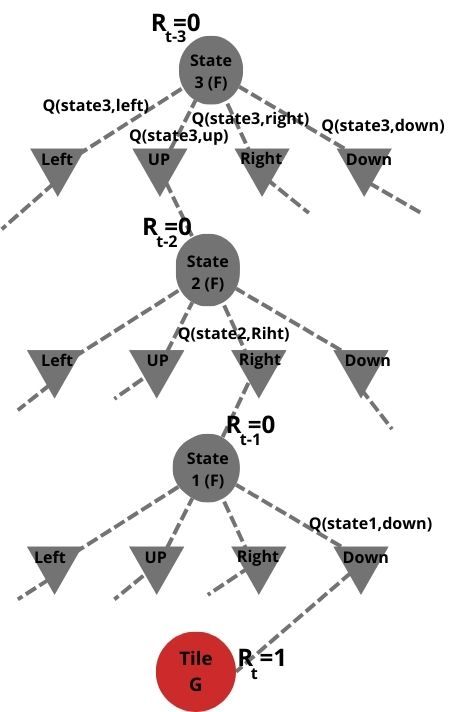

In [ ]:
HTML(html_code)

> Sarsa method update its state-action value thanks to the sarsa error : $ΔQ = α[R + γ*Q(S’,A’) - Q(S,A)]$. Thus, consider an environment where all the rewards are zero except when the agent reaches the goal state, in which the reward is equal to 1. <br>


> It is easy to see that it will be necessary to run the agent 3 times to eventually update the state-action value of state 3. In this particular situation, it is not that a huge issue, but let's consider a scenario where the agent is in a larger environment with, for example, 1000 states. You can imagine how problematic it will be.

> Thus, it is necessary to find solutions to these kinds of issues, specifically due to the credit assignment problem, to ensure that the agent correctly attributes credit to the actions leading up to the reward, even if those actions did not result in immediate positive feedback.

> Fortunately, two solutions have been considered to resolve these problems. One focuses on what happens in the future, and the other on the past. In this project, we will explore the 'backward' method one, called: **Eligibility Traces.**

> Eligibility traces is a mix of both MC and TD. It offers a smarter and more flexible approach. They work like a memory for the agent, keeping track of past actions and their outcomes. This helps the agent learn better, especially in situations where the effects of its actions take time to show up. The "trace" e(s,a) is a score that each past state-action pair gets, guiding the agent's learning process. Consequently it makes eligibility traces a useful tool in environments with delayed consequences.

# Setting up the environment

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install gymnasium
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install tqdm

Here is the 8x8 grid we use for this tutorial.

S is the starting point, F are the frozen parts of the lake our agent can walk on, H are the holes it can fall in and G is the goal.

The states are represented as $S=\{0,1,2,...,62,63\}$ and the agent is capable of movement in the four cardinal directions:  $A=\{left, down, right, up\} = \{0, 1, 2, 3\}$. As such, we will consider a state-action values matrix of size 64x4.

The lake is slippery (unless disabled) so the agent may move perpendicular to the intended direction sometimes. If true the agent will move in intended direction with probability of 1/3 else will move in either perpendicular direction with equal probability of 1/3 in both directions. We will set it to $False$ for the simplicity of this tutorial.

The episode starts with the player in state $0$ (top left corner).

The reward schedule goes as follows:

    Reach goal: +1

    Reach hole: 0

    Reach frozen: 0


The episode ends if the following happens:

    Termination:

        The player moves into a hole.

        The player reaches the goal at state 63 (bottom right corner).

    Truncation (when using the time_limit wrapper):

        The length of the episode is 100 for 4x4 environment, 200 for FrozenLake8x8-v1 environment.


In [ ]:
import matplotlib.pyplot as plt
import gymnasium as gym
import random
import numpy as np
import torch
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

np.random.seed(0)
torch.manual_seed(0)

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=False) # No Slipping

<center>

|            |            |            |            |            |            ||            |             
|------------|------------|------------|------------|------------|------------|------------|------------|
| `S` | `F` | `F` | `F` | `F` | `F` | `F` | `F` |
| `F` | `F` | `F` | `H` | `F` | `F` | `F` | `F` |
| `F` | `F` | `F` | `H` | `F` | `F` | `F` | `F` |
| `F` | `F` | `F` | `H` | `F` | `F` | `F` | `F` |
| `F` | `F` | `F` | `H` | `F` | `F` | `F` | `F` |
| `F` | `H` | `H` | `F` | `F` | `F` | `H` | `F` |
| `F` | `H` | `F` | `F` | `H` | `F` | `H` | `F` |
| `F` | `F` | `F` | `H` | `F` | `F` | `F` | `G` |

 </center>


We define helper functions that will make the code easier to read during the tutorial.

In [ ]:
def random_policy(state, seed=0):
    """
    Input: state (int) [0, .., 65]
    output: action (int) [0,1,2,3] in other word : [left, down, right, up]
    """
    return np.random.randint(0,4)

def plot_many(experiments, label=None, color=None):
    mean_exp = np.mean(experiments, axis=0)
    std_exp = np.std(experiments, axis=0)
    plt.plot(mean_exp, color=color, label=label)
    plt.fill_between(range(len(experiments[0])), mean_exp + std_exp, mean_exp - std_exp, color=color, alpha=0.1)

def random_argmax(value_list):
    """ a random tie-breaking argmax """
    values = np.asarray(value_list)
    return np.argmax(np.random.random(values.shape) * (values==values.max()))

def make_eps_greedy_policy(state_action_values, epsilon):
  """
  Implementation of epsilon-greedy policy
  Input:
      state_action_values (list[list]): first axis maps over states of an environment, and second axis the actions.
                                      The stored values are the state-action values corresponding to the state and action index
      epsilon (float): Probability of taking a random action
  Returns policy (int -> int): method taking a state and returning a sampled action to take
  """
  def policy(state):
    if np.random.rand() < epsilon:
      return random_policy(state)
    else:
      return random_argmax(state_action_values[state])

  return policy

def generate_episode(policy, env, render=False, seed=0):
    """
    Input:
        policy (int -> int): policy taking a state as an input and outputs a given action
        env (DiscreteEnv): The FrozenLake environment
        render (bool): Whether or not to render the episode
    Returns:
        states (list): the sequence of states in the generated episode
        actions (list): the sequence of actions in the generated episode
        rewards (list): the sequence of rewards in the generated episode
    """
    states = []
    rewards = []
    actions = []
    done = False
    state, _ = env.reset(seed=seed) # Get the first state
    states.append(state)

    while not done:
        if render:
            env.render()

        action = policy(state) # The policy gives us the next action
        actions.append(action)

        next_state, reward, is_truncated, done, _ = env.step(action) # Get the associated reward and the next state.
        rewards.append(reward)

        done = done or is_truncated

        state = next_state
        states.append(state)

    return states, actions, rewards

Finally, we introduce a function that will easily represent the state values.

In [ ]:
def heatmap(array, label=None, ax=plt, show=True):
  map = np.reshape(array,(8,8))
  # Create a heatmap
  im = plt.imshow(map, cmap='magma', interpolation='nearest')
  if ax :
    if label : ax.set_title(label)
    ax.axis('off')
    if show :
      # Show the heatmap
      ax.show()

  else :
    if label : plt.title(label)
    plt.axis('off')
    if show :
      plt.colorbar()
      # Show the heatmap
      plt.show()
  return im

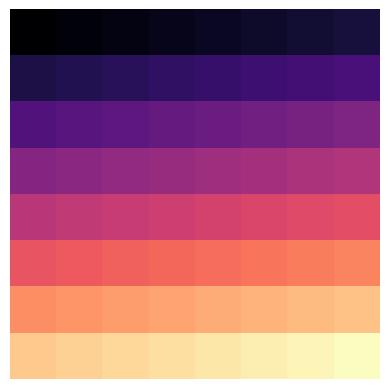

In [ ]:
# Example of this function in use:

example = np.arange(0,1,1/64)
heatmap(example)

**We** also create a function `animation_display` that will represent the evolution of the state-action value Q as a function of the number of episodes.

In [ ]:
def animation_display(sav_all, title=''):
  # initialize the animation
  def init():
      return plt.gcf(),

  # update the heatmap for each frame
  def update(frame):
      sav = sav_all[frame]
      sv = np.max(sav, axis=1)
      plt.clf()       # Clear the previous frame
      heatmap(sv, ax=ax, show=False)
      plt.title(f'Episode {frame}')
      fig.suptitle(title, fontsize=16)
      return plt.gcf(),

  fig, ax = plt.subplots()

  # Set up the animation
  num_frames = np.shape(sav_all)[0]
  frame_interval = int(num_frames/50)
  animation = FuncAnimation(fig, update, init_func=init, frames=range(0, num_frames, frame_interval), blit=True, repeat=False)

  # Display the animation
  return HTML(animation.to_jshtml())

# Dynamic Programming (true values)

We'll start by evaluating the actual state values using Dynamic Programming. The following paragraphs will only briefly explain this subject since it is not the focus of this tutorial. Note that we use a discount factor that directly influences the values of the states. We arbitrarely choose a common value, since the point is to get a first understandable visualization of the problem.

Dynamic Programming (DP) refers to a collection of algorithms that can be used to compute the optimal policies given a perfect Markovian Decision Process (MDP). The assumptions are strong, but DP provides a firm foundation for other methods. It so happens that we have full knowledge of the MDP for the frozen lake, so we can use these methods. Even if we set *is_slippery = True*, we know what the transition probabilities are. Once we find an optimal policy, we can use it to compute the action-state values and thus the state values.

The methods we will use are policy evaluation, improvement and iteration. To put it simply, we use the Bellman equations (see below) to evaluate a policy, then we improve it by greedily taking the action that looks best in the short term (one step lookahead) according to $v_π$. Repeating these two steps is what we call policy iteration.

$$v_\pi(s) = \sum_a \pi(a|s) \sum_{s',r} p(s',r | s,a)[r + \gamma v_\pi(s')]$$

The following implementation is based on Barto&Sutton's book.

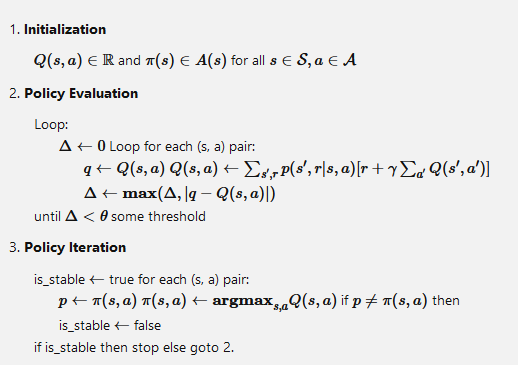

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(



Optimal State Values:


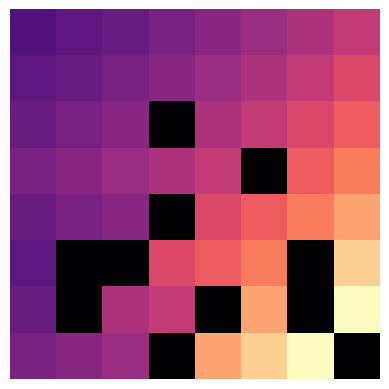

In [ ]:
import numpy as np

def policy_evaluation(env, policy, gamma=0.9, theta=1e-6, seed=0):
    num_states = env.observation_space.n
    num_actions = env.action_space.n

    V = np.zeros(num_states)

    while True:
        delta = 0
        for s in range(num_states):
            v = 0
            for a, action_prob in enumerate(policy[s]):
                transitions = env.P[s][a]
                for prob, next_state, reward, _ in transitions:
                    v += action_prob * prob * (reward + gamma * V[next_state])

            delta = max(delta, np.abs(v - V[s]))
            V[s] = v

        if delta < theta:
            break

    return V

def policy_improvement(env, V, gamma=0.9):
    num_states = env.observation_space.n
    num_actions = env.action_space.n

    new_policy = np.zeros([num_states, num_actions])

    for s in range(num_states):
        q_values = np.zeros(num_actions)
        for a in range(num_actions):
            transitions = env.P[s][a]
            for prob, next_state, reward, _ in transitions:
                q_values[a] += prob * (reward + gamma * V[next_state])

        best_action = np.argmax(q_values)
        new_policy[s][best_action] = 1.0

    return new_policy

def policy_iteration(env, gamma=0.9, theta=1e-6, seed=0):
    num_states = env.observation_space.n
    num_actions = env.action_space.n

    # Initialize a random policy
    policy = np.ones([num_states, num_actions]) / num_actions

    while True:
        # Policy evaluation
        V = policy_evaluation(env, policy, gamma, theta)

        # Policy improvement
        new_policy = policy_improvement(env, V, gamma)

        # Check if the policy has converged
        if np.array_equal(new_policy, policy):
            break

        policy = new_policy

    return policy, V

# Perform policy iteration
optimal_policy, optimal_values = policy_iteration(env)

# Display the optimal policy and state values
print("\nOptimal State Values:")
heatmap(optimal_values)

Note that here the goal tile is black, which is not really intuitive at first sight. However, it is because when the agent goes to G, there is no action to take, in other words, no state-action pairs to update. Thus, it receives no reward or penalty, essentially remaining in the same state. We could artificially color it in white, but we've decided to leave it as it is.

# Usual Methods

We will first delve into two fundamental reinforcement learning methods: SARSA and Monte Carlo methods. SARSA is an on-policy temporal difference learning algorithm that estimates the value of state-action pairs iteratively. Monte Carlo methods, on the other hand, operate by generating complete episodes of an agent interacting with an environment and then using the returns from these episodes to update the value estimates. These methods offer distinct approaches to reinforcement learning, each with its strengths and limitations. We will then transition to SARSA(λ), an extension of SARSA that incorporates eligibility traces to balance the trade-off between bootstrap and Monte Carlo updates. We will delve into SARSA(λ)'s ability to adapt to changing environments and its performance compared to its predecessors.

We invite the reader to read Sutton&Barto's book to have a good understanding of how these methods work before going into SARSA(λ).

## Monte-Carlo

The following cells implement Every-Visit Monte-Carlo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mc_control(env, epsilon=0.1, num_episodes=100, discount=0.99, seed=0):
    """
    Input:
        env (DiscreteEnv): The FrozenLake environment
        num_episodes (int): Number of episodes for MC control
        discount (float): Discount factor
        epsilon (float): Epsilon value for epsilon-greedy policy
        step_size (float): Step size for updating state-action values
    Returns state_action_values_trace (list of lists):
        Q-value estimates of each state-action pair at every episode of training.
    """
    np.random.seed(seed)

    num_states = env.observation_space.n
    num_actions = env.action_space.n

    Q_values = np.zeros((num_states, num_actions))
    returns = {(s, a): [] for s in range(num_states) for a in range(num_actions)}
    policy = make_eps_greedy_policy(Q_values, epsilon)

    Q_values_trace = []

    for episode in range(num_episodes):
        states, actions, rewards = generate_episode(policy, env, seed=seed)
        visited_state_actions = set()

        G = 0
        for t in reversed(range(len(states) - 1)):
            state = states[t]
            action = actions[t]

            G = discount * G + rewards[t]
            state_action_pair = (state, action)

            if state not in range(num_states) or action not in range(num_actions):
                print(f"Issue with state {state} or action {action}")
            else:
                returns[state_action_pair].append(G)
                Q_values[state][action] = np.mean(returns[state_action_pair])

        Q_values_trace.append(Q_values.copy())

    return Q_values_trace

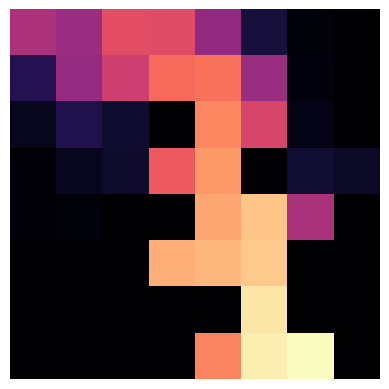

In [ ]:
# We plot the evolution.
# You can play with epsilon (setting it closer to 1) to allow to agent to explore more!

epsilon = 0.1 #@param {allow-input: true}
discount = 0.99 #@param {allow-input: true}
num_episodes = 3000 #@param {allow-input: true}

mc_sav_all = mc_control(env, epsilon=epsilon, discount=discount, num_episodes=num_episodes)
mc_sv = np.max(mc_sav_all[-1], axis=1)
heatmap(mc_sv)

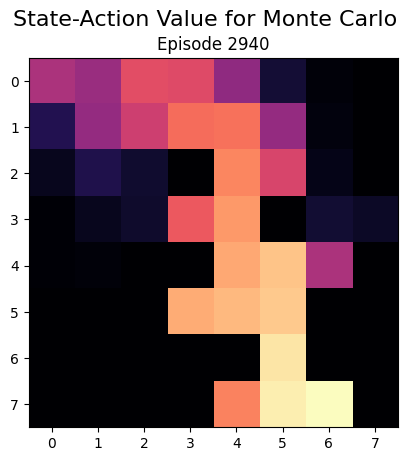

In [ ]:
animation_display(mc_sav_all, title = 'State-Action Value for Monte Carlo')

Here we can see how the state-action value for Monte Carlo updates evolves over the course of an episode, capturing the total reward obtained from the initial state to the terminal state. It performs overall pretty good results.! But might be a bit slow.

## SARSA

The following cells implement SARSA.

In [ ]:
np.random.seed(0)

In [ ]:
import numpy as np

def sarsa_control(env, n, epsilon, step_size=0.1, num_episodes=100, discount=0.99, seed=0):
    """
    Input:
        env (DiscreteEnv): Frozen Lake environment
        n (int): Number of steps before bootstrapping
        epsilon (float): Epsilon value for epsilon-greedy policy
        step_size (float): step size alpha of td learning
        num_episodes (int): number of episodes to run the algorithm for
        discount (float): discount factor
    Returns state_action_values_trace (list of lists):
        Q-value estimates of each state-action pair at every episode of training.
    """
    np.random.seed(seed)

    num_states = env.observation_space.n
    num_actions = env.action_space.n
    state_action_values = np.zeros((num_states, num_actions))
    state_action_values_trace = []

    # Implementation based on Barto & Sutton's book
    for j in range(num_episodes):
        state, _ = env.reset(seed=seed)
        policy = make_eps_greedy_policy(state_action_values, epsilon)
        action = policy(state)
        done = False

        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_action = policy(next_state)

            done = terminated or truncated
            delta = reward + discount * state_action_values[next_state][next_action] - state_action_values[state][action]
            state_action_values[state][action] += step_size * delta

            state = next_state
            action = next_action

        state_action_values_trace.append(state_action_values.copy())

    return state_action_values_trace

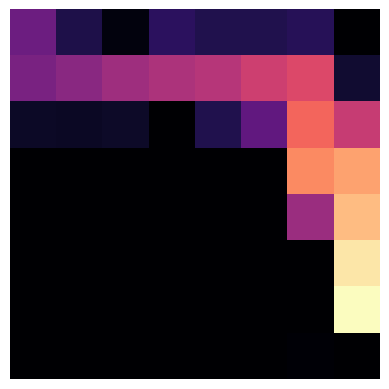

In [ ]:
# We plot the evolution

n = 20 #@param {allow-input: true}
step_size = 0.01 #@param {allow-input: true}
epsilon = 0.1 #@param {allow-input: true}Fortunately, two solutions have been considered to resolve these problems. One focuses on what happens in the future, and the other on the past. In this project, we will explore the opposite method, called: Eligibility Traces.
discount = 0.99 #@param {allow-input: true}
num_episodes = 3000 #@param {allow-input: true}

sarsa_sav_all = sarsa_control(env, n=n, epsilon=epsilon, step_size=step_size, discount=discount, num_episodes=num_episodes)
sarsa_sv = np.max(sarsa_sav_all[-1], axis=1)
heatmap(sarsa_sv)

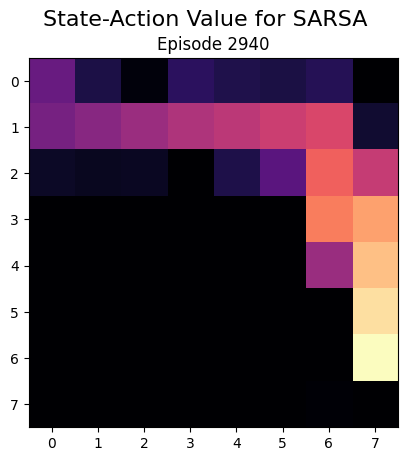

In [ ]:
animation_display(sarsa_sav_all, title = 'State-Action Value for SARSA')

n SARSA updates, we observe the continuous refinement of state-action values throughout an episode. The SARSA algorithm iteratively adjusts Q-values at each time step, integrating both immediate rewards and expected future rewards as the agent navigates the environment. However, it can be relatively slow when dealing with a large number of states, as the algorithm's sequential nature may require considerable time to explore and update estimates for each state-action pair. Moreover, variance can be quite high, introducing undesired consequences such as overfitting and instability in the learning process. This motivates us to explore alternative solutions!

# Eligibility Traces for $SARSA(λ)$

Combination of both methods and explanation of its algorithm.

We will now implement Eligibility Traces. To fully understand how it works, we first have to talk about function approximation. Now, instead of using action-state pairs, we will now use a weight vector and a feature vector.

### Function Approximation

$w$ is the weight vector
$x(s)$ is a feature vector representing state s

For this application, we will consider that the function v(s,w) is a linear combination of w, such that:
$\hat{v}(s, w) = w^T x(s) = \sum_{i=1}^{d} w_i x_i(s)$

Using Stochastic Gradient Descent (SGD) with linear function approximation is easy because the gradient of the approximate value function with respect to w is: $∇\hat{v}(s,w)=x(s)$


Thus the linear case SGD update is:
$w_{t+1}=w_t+α[U_t−\hat{v}(S_t,w_t)]x(S_t)$

Now these describe the approximation for state values, but we actually want action-state values. Fortunately, not much changes: $\hat{v}$ becomes $\hat{q}$ and the feature vector becomes $x(s,a)$ (which affects the shape of $w$).

One might wonder what our feature vector will look like. Well, we will just use one-hot encoding on all our state-pair values, because our environment is small enough to be efficiently described this way. This means that $∇\hat{q}(s,a,w)=x(s,a)$ is the 0-matrix with a single $1$ at position $(s,a)$.

### Eligibility Traces

#### We first present a new kind of return: $\lambda$-return, as well as $TD(λ)$.

Looking at $TD(λ)$ will help us understand the basics of eligibility traces and then we will move on to $SARSA(λ)$.

To compute n-step Temporal Difference returns, we compute the first n rewards and the estimated value of the state reached in n steps, each appropriately discounted, such that:
$$G_{t:t+n} = R_{t+1} + \gamma R_{t+2} + \ldots + \gamma^{n-1} R_{t+n} + \gamma^n \hat{v}_{t+n-1}(S_{t+n}, w_{t+n-1})$$

With the $TD(λ)$ algorithm, we introduce a particular way of averaging n-step updates, each weighted by λ(n−1) and normalized by (1−λ) to ensure the weights sum to 1: $$G^{\lambda}_t = (1 - \lambda) \sum_{n=1}^{\infty} \lambda^{n-1} G_{t:t+n}$$

As such, our weight updates will look like this: $$w_{t+1} = w_t + \alpha \left[ G^{\lambda}_t - \hat{q}(S_t, A_t, w_t) \right] \nabla \hat{q}(S_t,A_t, w_t)
$$

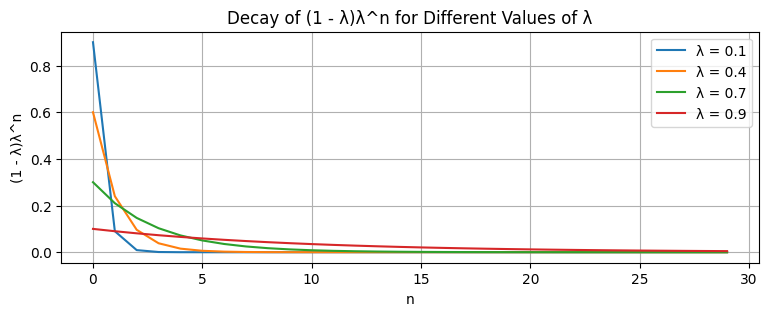

In [ ]:
n_values = np.arange(0, 30)
lambda_values = [0.1, 0.4, 0.7, 0.9] # value of lambda to compare with
decay_function(n_values, lambda_values) # function in the image folder

The graph illustrates the impact of varying lambda values on the initial value of a return and the its decay over time. Larger lambda values result in a more gradual decay, indicating that information from the past retains kind of influence. In other words, higher lambda values assign non-negligible importance to historical experiences, contributing to a slower decline in the relevance of past actions as time progresses.

#### Before going into the implementation of SARSA, let's shed some light on the theoretical background behind it.

We'll maintain a short term vector $z_t \in \mathbb{R}^d$ that parallels the long term vector $w_t$.
When a component of $w_t$ participates in producing an estimated value, then the corresponding component of $z_t$
is bumped up and after begins to fade away (trace-decay $λ∈[0,1]$). In this case, the component of $w_t$ that participates is the weight related to the current state-action pair. If a non-zero TD occurs before the trace fades away, we have learning.

Mathematically, it looks like this: $$\mathbf{z}_t = \gamma \lambda \mathbf{z}_{t-1} + \nabla \hat{q}(S_t, A_t, w_t),$$
where $γ$ is the discount factor and $λ$ is the eligibility trace decay parameter.

We also define the error $\delta_t$ such that: $$\delta_t = R_{t+1} + \hat{q}(S_{t+1}, A_{t+1}, w_t) - \hat{q}(S_t, A_t, w_t)
$$

In turn, this vector is used to update the weight vector: <br><br>$$w_{t+1} = w_t + \alpha \delta_t \mathbf{z}_t
$$ <br><br>
Now you can easily see how the eligibility trace is used to update the weights $w_t$ in a way that takes into account the influence of past states and actions.

#### Implementation of $SARSA(\lambda)$

Here is the algorithm in Sutton & Barto's book:

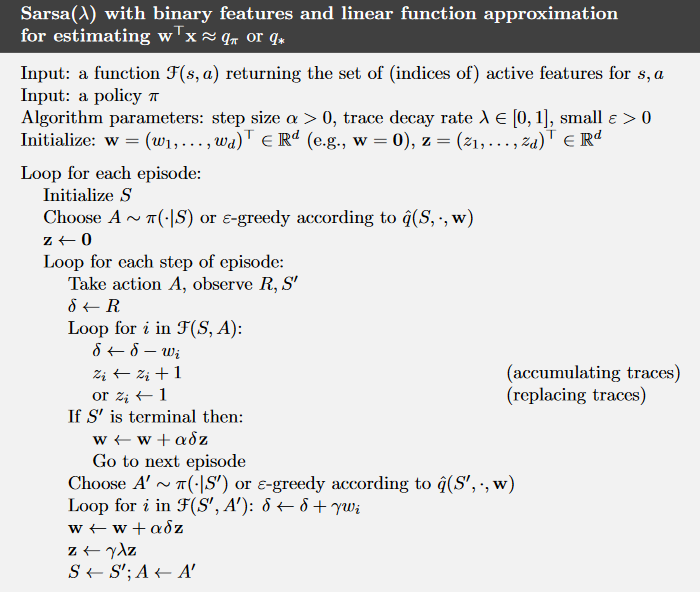

Since we one-hot encoded our action-state pairs, $\hat{q}(s, a, w) = w^T x(s,a) = \sum_{i=1}^{d} w_i x_i(s,a) = w_i(s,a)$.

This means that in this very simple case, the state action values will be equal to their associated weights.

In [ ]:
def sarsa_lambda(env, num_episodes=1000, step_size=0.1, discount=0.99, epsilon=0.1, lambda_val=0.9, trace_type = 'accumulate'):
    """
    Input:
        policy (int -> int): policy to evaluate
        env (DiscreteEnv): FloorIsLava environment
        epsilon (float): parameter for our epsilon-greedy policy
        step_size (float): step size alpha of SARSA(λ) learning
        num_episodes (int): number of episodes to run the algorithm for
        discount (float): discount factor
        lambda_val (float): eligibility trace decay parameter (lambda)
    Returns state_action_values_trace (list of lists):
        Q-value estimates of each state-action pair at every episode of training.
    """

    if trace_type not in ['replace', 'accumulate']:
        raise ValueError("Invalid value for trace_type. Choose either 'replace' or 'accumulate'.")

    num_states = env.observation_space.n
    num_actions = env.action_space.n

    state_action_values = np.zeros((num_states, num_actions))
    state_action_values_trace = []

    for j in range(num_episodes):
        state, _ = env.reset(seed=42)
        policy = make_eps_greedy_policy(state_action_values, epsilon)
        action = policy(state)
        done = False
        E = np.zeros((num_states, num_actions))  # Eligibility trace matrix

        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_action = policy(next_state)
            done = terminated or truncated

            delta = reward + discount * state_action_values[next_state, next_action] - state_action_values[state, action]

            if trace_type == 'replace':
                E[state, action] = 1  # Replace the trace with the current gradient
            else :
                E[state, action] += 1  # The gradient of the feature vector would just be +1 to the corresponding state-action pair



            for s in range(num_states):
                for a in range(num_actions):
                    state_action_values[s, a] += step_size * delta * E[s, a]  # Updating the weights = state-action values.

                    E[s, a] *= discount * lambda_val  # Updating the traces for the next step


            state = next_state
            action = next_action

        state_action_values_trace.append(state_action_values.copy())

    return state_action_values_trace

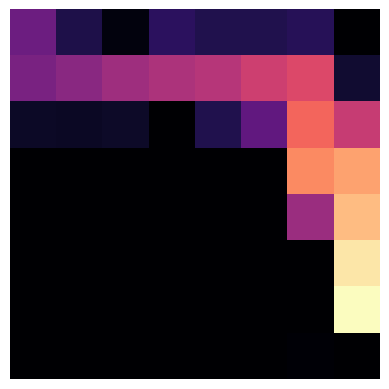

In [ ]:
# We plot the evolution

lambda_val = 0.9 #@param {allow-input: true}
step_size = 0.01 #@param {allow-input: true}
epsilon = 0.1 #@param {allow-input: true}
discount = 0.99 #@param {allow-input: true}
num_episodes = 3000 #@param {allow-input: true}

sarsaL_sav_all = sarsa_lambda(env, num_episodes=num_episodes, step_size=step_size, discount=discount, epsilon=epsilon, lambda_val=lambda_val) #accumulating traces
sarsaL_sv = np.max(sarsaL_sav_all[-1], axis=1)
heatmap(sarsa_sv)

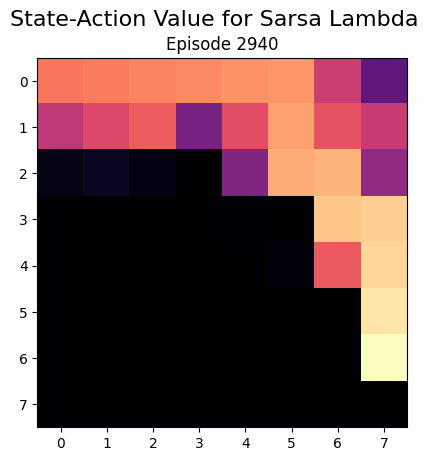

In [ ]:
# We plot the evolution
animation_display(sarsaL_sav_all, title = 'State-Action Value for Sarsa Lambda')

In observing the animations over episodes, SARSA(λ) stands out in its unique learning behavior. Unlike Monte Carlo, which updates values at the end of each episode, SARSA(λ) exhibits a more continuous and nuanced adjustment of state-action values throughout the episodes. The eligibility traces introduce a dynamic aspect to the learning process, allowing the algorithm to consider both short-term and long-term consequences of actions. This becomes especially apparent when compared to the more myopic updates of SARSA, which only considers immediate rewards. <br><br>
However, it's important to note that the effectiveness of SARSA(λ) depends on finding the right balance with the λ parameter, and its computational demands may increase compared to simpler algorithms like SARSA or Q-learning. In animations over episodes, a higher lambda often leads to more persistent updates in state-action values, reflecting the agent's consideration of not just immediate rewards but also those occurring further into the future. It is something we will delve into in the following parts ! <br><br><br>

#### Accumulating traces and replacing traces

Note that we have added the option to choose between replacing traces and accumulating traces. Indeed, the conventional 'accumulating traces' may not always be the optimal choice when utilizing Eligibility Traces. In eligibility trace methods, the objective is to effectively convey learning outcomes along trajectories, capturing acquired knowledge and enhancing learning efficiency. However, relying solely on the accumulation of traces from all previous visits can present challenges. Undesirable actions in a given state might disproportionately accumulate influence compared to desirable ones, leading to inaccuracies in value approximations due to flawed sampling. To address this issue, replace-trace methods are introduced, resetting the eligibility trace each time a state is revisited. This dynamic approach prevents the persistent impact of outdated information, fostering a more adaptable response to changing conditions. This strategy strikes a nuanced balance between stability and the precise representation of acquired knowledge. The following image, from Sutton and Barto book,might help you understand this idea.

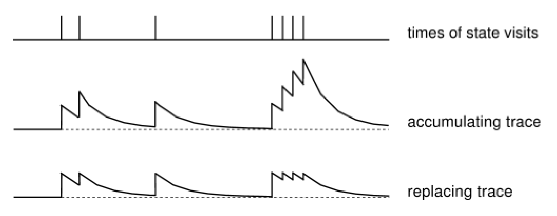

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# We redefine heatmap to create the slider with ease

def display_heatmaps_traces(i):
    sarsa_sv_replace = np.max(sarsa_lambda(env, num_episodes=num_episodes, step_size=step_size, discount=discount, epsilon=epsilon, lambda_val=0.1, trace_type='replace')[i], axis=1)
    sarsa_sv_accumulate = np.max(sarsa_lambda(env, num_episodes=num_episodes, step_size=step_size, discount=discount, epsilon=epsilon, lambda_val=0.5)[i], axis=1)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    heatmap(sarsa_sv_replace, label='replace', show=False)

    plt.subplot(1, 2, 2)
    heatmap(sarsa_sv_accumulate, label='accumulate', show=False)

    plt.show()

#manual slider, to choose which frame to see
i_slider = widgets.IntSlider(value=0, min=1000, max=2999, step=1, description='i')

interact(display_heatmaps_traces, i=i_slider)


interactive(children=(IntSlider(value=1000, description='i', max=2999, min=1000), Output()), _dom_classes=('wi…

<function __main__.display_heatmaps_traces(i)>

By changing the index i, it's interesting to see the differences between both methods. We see that with replacing traces, the state-values for the early states are much higher than they were with both accumulating traces and dynamic programming. This illustrates how the former allowed the agent to balance the weight of the updates differently: by replacing the traces everytime, we end overestimating some states although it still shows a clear yet unoptimized path to the goal. <br>
We could also note that, replacing traces heatmap seems to exhibit more volatility, which is maybe due to the fact that replacing traces is more focused on the most recent values of the learning. On the other hand,we can see that the accumulating traces heatmap has smoother behavior over learning. Maybe because this method is less sensitive to short-term changes in the environment compared to replacing traces.

# Comparison of Sarsa n-step, MC, and SARSA(λ) for different value of λ

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# We redefine heatmap to create the slider with ease

def heatmap(array, label='', show=True):
    map = np.reshape(array, (8, 8))
    # Create a heatmap
    plt.imshow(map, cmap='magma', interpolation='nearest')
    plt.title(label)
    plt.colorbar()
    plt.axis('off')

    if show:
        plt.show()

def display_heatmaps(i):
    sarsa_sv = np.max(sarsa_sav_all[i], axis=1)
    mc_sv = np.max(mc_sav_all[i], axis=1)
    sarsaL_sv = np.max(sarsaL_sav_all[i], axis=1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    heatmap(sarsa_sv, label='SARSA n=20', show=False)

    plt.subplot(1, 3, 2)
    heatmap(mc_sv, label='Monte Carlo', show=False)

    plt.subplot(1, 3, 3)
    heatmap(sarsaL_sv, label='SARSA(Lambda)', show=False)

    plt.show()

#manual slider, to choose which frame to see
i_slider = widgets.IntSlider(value=0, min=0, max=2999, step=1, description='i')

interact(display_heatmaps, i=i_slider)


interactive(children=(IntSlider(value=0, description='i', max=2999), Output()), _dom_classes=('widget-interact…

<function __main__.display_heatmaps(i)>

Sarsa n-step, Monte Carlo (MC), and SARSA(λ) are all reinforcement learning algorithms with distinct characteristics. Sarsa n-step balances bias and variance by updating values every n steps, making it suitable for various tasks. MC, on the other hand, updates values at the end of each episode, providing unbiased estimates but with high variance. SARSA(λ) introduces eligibility traces, dynamically combining short-term and long-term considerations for more nuanced learning. While Sarsa n-step adapts to different environments by adjusting the step size, MC excels in episodic tasks but faces high computational costs. SARSA(λ) demonstrates adaptability to delayed rewards but requires careful tuning of the lambda parameter. Each algorithm has its strengths and trade-offs, making the choice context-dependent based on specific task requirements and environmental characteristics.
We see on graphs that in general, Sarsa(λ) is better than n-step Sarsa and pretty similar behaviors than MC (for high value of λ) for this specific environnement, which are some really good results.

#### Influence of the lambda parameter on eligibility traces

In [ ]:
from ipywidgets import interact, widgets
import numpy as np
import matplotlib.pyplot as plt


def display_heatmaps_lambda(i):
    sarsa_sv_1 = np.max(sarsa_lambda(env, num_episodes=num_episodes, step_size=step_size, discount=discount, epsilon=epsilon, lambda_val=0.1)[i], axis=1)
    sarsa_sv_5 = np.max(sarsa_lambda(env, num_episodes=num_episodes, step_size=step_size, discount=discount, epsilon=epsilon, lambda_val=0.5)[i], axis=1)
    sarsa_sv_8 = np.max(sarsa_lambda(env, num_episodes=num_episodes, step_size=step_size, discount=discount, epsilon=epsilon, lambda_val=0.8)[i], axis=1)

    plt.figure(figsize=(15, 5))


    plt.subplot(1, 3, 1)
    heatmap(sarsa_sv_1, label='SARSA λ=0.1', show=False)

    plt.subplot(1, 3, 2)
    heatmap(sarsa_sv_5, label='SARSA λ=0.5', show=False)

    plt.subplot(1, 3, 3)
    heatmap(sarsa_sv_8, label='SARSA λ=0.8', show=False)


    plt.show()

i_slider = widgets.IntSlider(value=0, min=2500, max=2999, step=1, description='i')

interact(display_heatmaps_lambda, i=i_slider)

interactive(children=(IntSlider(value=2500, description='i', max=2999, min=2500), Output()), _dom_classes=('wi…

<function __main__.display_heatmaps_lambda(i)>

Here we can see the impact of lamda on the eligbility traces algorithm. As lambda increases, the eligibility trace gives more weight to past actions, influencing the learning process. Higher lambda values tend to promote a more persistent influence of past experiences. Thus we can see on the three heatmaps that there is a smoother transition between states, there is indeed a lower variance. On the other hand, lower lambda shows more volatility because the agent is adapting more quickly to changes in the environment, involving a lower bias. <br><br> In this particular case, it seems that a lambda close to 0.5, ie a balanced lambda, often yields good results.

# Conclusion

**In this comprehensive eligibility traces tutorial, we've embarked on a journey to demystify this powerful concept in reinforcement learning. Through a exploration of eligibility traces, we've gathered insights into their significance, and the nuances involved in their implementation. <br><br>
Eligibility traces, acting as a form of short-term memory, provide an serious solution to the credit assignment problem in temporal difference learning and stability in the learning process. Their ability to efficiently propagate credit over multiple time steps enables the algorithm to associate rewards with not just immediate actions but also those from earlier states, leading to more informed and context-aware updates of value estimates. <br><br>
To fully understand this topic feel free to tweak parameters, try different trace types (accumulating or replacing), and observe how these variations impact the learning process. This hands-on experience will deepen your intuition and empower you to navigate the subtleties of eligibility traces in reinforcement learning.**